# Index   

0. [Importing libraries](#-0.-Importing-libraries) 

1. [Exploratory Data Analysis](#-1.-Exploratory-Data-Analysis)

2. [Building the Convolutional Neuronal Network](#2.-Convolutional-Neuronal-Network)
    
3. [Predictions](#-3.-Predicitons)
 
4. [Results & Conclusions](#-6.-Results-&-Conclusions)

5. [References](#-7.-References)

6. [Other](#-8.-Other)

# 0. Importing libraries

In [211]:
#Data exploration & manipulation
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.style as style 
import datetime as dt
import os
import matplotlib.pyplot as plt
import sweetviz as sv


print('sweetviz: %s' % sv.__version__) # print version

#ML Models search and optimisation
from pycaret.classification import * 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import optuna
print('optuna: %s' % optuna.__version__) # print version
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, RepeatedKFold, GridSearchCV


%matplotlib inline



# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version




# Sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.preprocessing import OrdinalEncoder # for encoding labels
from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import StratifiedShuffleSplit # to split stratified 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA

# Visualization
import matplotlib.image as mpimg
import plotly.io as pio #To fix an issue with the renderer of graphs in VSC
pio.renderers
import matplotlib 
import matplotlib.pyplot as plt # for showing images
print('matplotlib: %s' % matplotlib.__version__) # print version
import random
import seaborn as sns
sns.set_style('white')
%matplotlib inline


# Other utilities
import sys
import os
from platform import python_version
import datetime
from time import localtime, strftime, gmtime
import pathlib
from glob import glob
from tqdm import tqdm


print('python version: %s' % python_version()) # print version

sweetviz: 2.1.4
optuna: 2.10.0
pandas: 1.3.5
numpy: 1.19.5
sklearn: 0.23.2
matplotlib: 3.5.1
python version: 3.7.12


# 1. Exploratory Data Analysis

In [212]:
# Import initial files from the website

acad_Yield_train = pd.read_csv("https://challenges-asset-files.s3.us-east-2.amazonaws.com/Events/Talent+Squad+League/3rd_batch/data/train.csv", index_col='Unnamed: 0')

acad_Yield_test = pd.read_csv("https://challenges-asset-files.s3.us-east-2.amazonaws.com/Events/Talent+Squad+League/3rd_batch/data/test.csv", index_col='Unnamed: 0')

In [215]:
acad_Yield_train

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
764,female,1,standard,none,62,76,67
866,male,4,standard,none,79,57,58
208,female,2,standard,none,77,86,84
337,female,0,free/reduced,none,45,46,49
323,male,3,standard,completed,82,83,85
...,...,...,...,...,...,...,...
272,male,0,standard,completed,74,71,65
853,male,2,standard,completed,72,72,72
894,male,3,standard,none,86,77,78
179,male,0,standard,completed,89,87,86


In [214]:
acad_Yield_test

,gender,lunch,test preparation course,math score,reading score,writing score
79,male,standard,none,54,43,45
277,female,standard,none,72,77,77
855,female,standard,none,87,97,100
922,male,standard,none,55,55,55
332,male,standard,none,56,54,43
...,...,...,...,...,...,...
299,male,standard,none,47,43,39
675,male,standard,none,75,69,65
117,male,standard,completed,59,57,55
715,male,standard,none,73,66,59


In [5]:
acad_Yield_train.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Let's do a fast exploration of train and test dataset with the library sweetviz.m

In [6]:
feature_config = sv.FeatureConfig(force_num=["math score", "reading score", "writing score", "parental level of education"], force_cat=["gender", "lunch", "test preparation course"])

In [7]:
#analyzing the training dataset

acad_Yield_train_report = sv.analyze(acad_Yield_train, target_feat = 'parental level of education', feat_cfg=feature_config) 

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



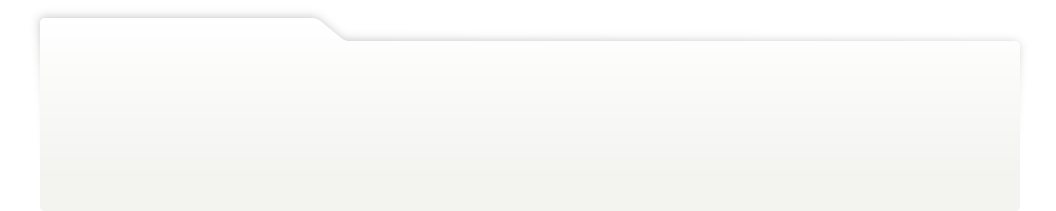
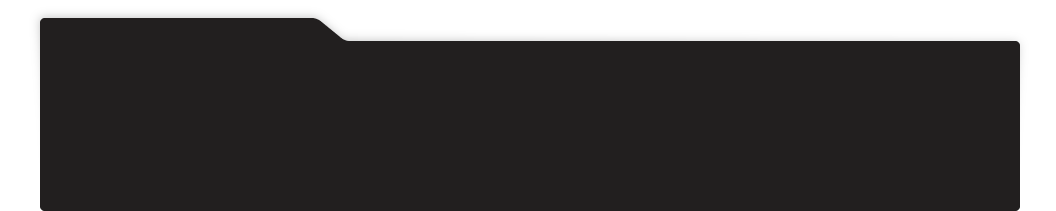
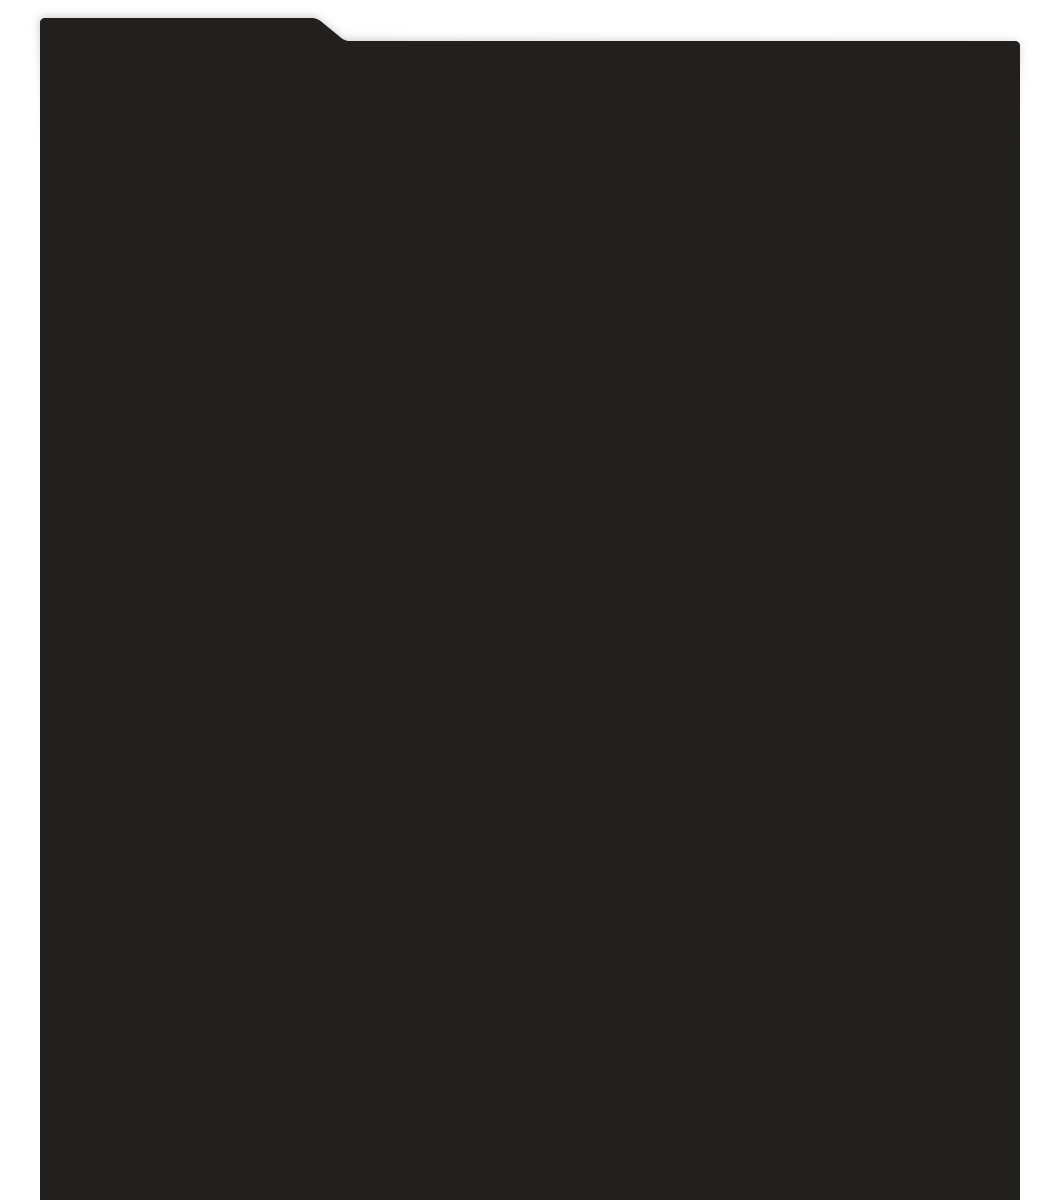
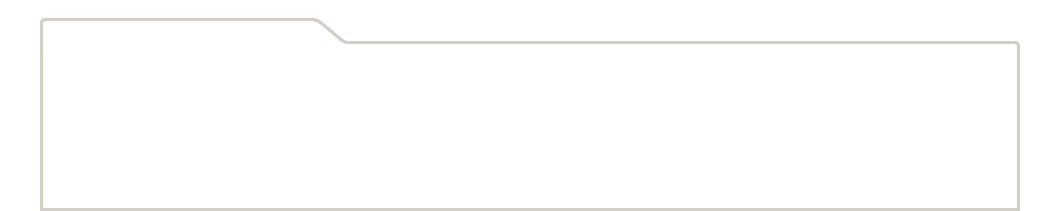
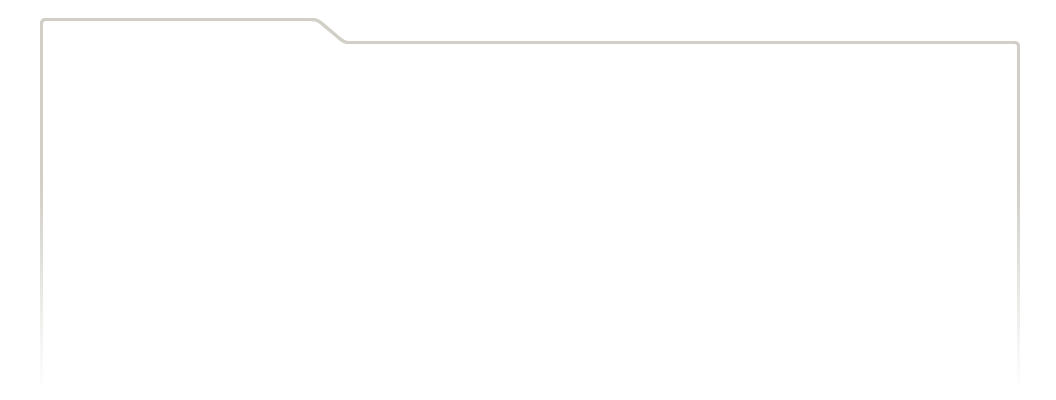
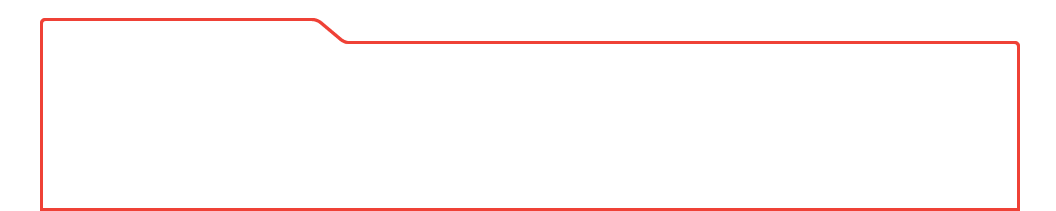
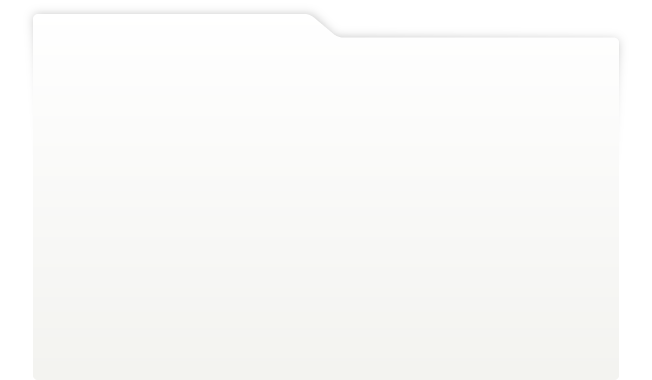
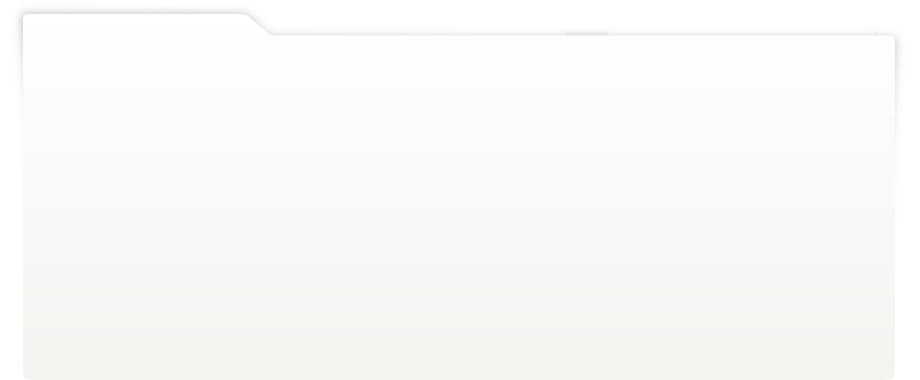
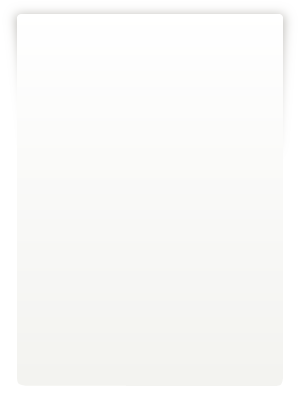
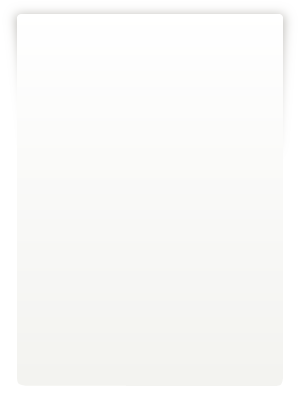
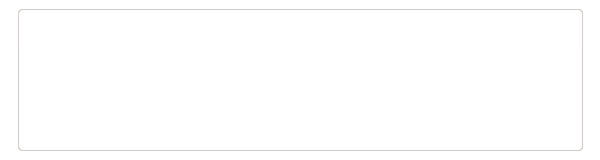
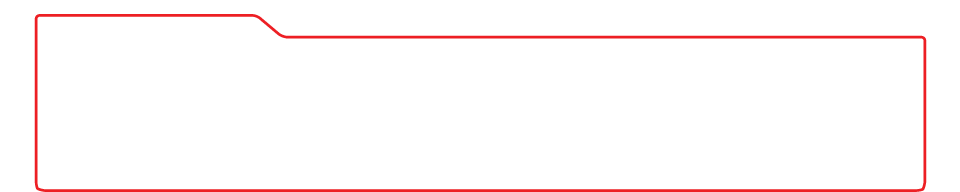
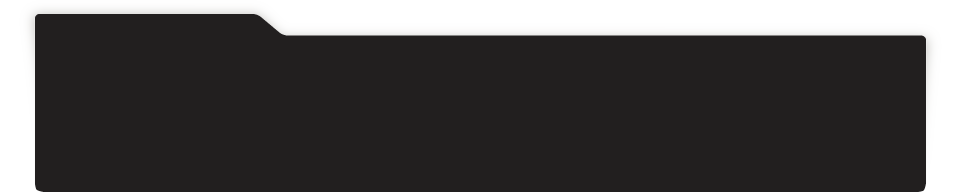
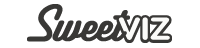
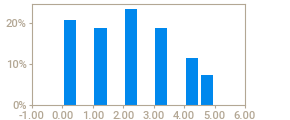
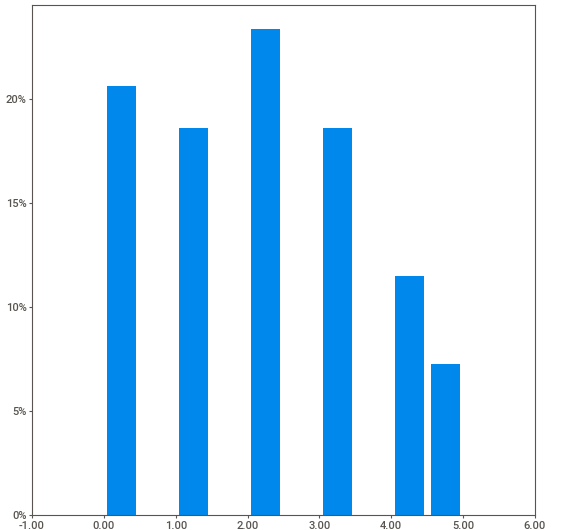
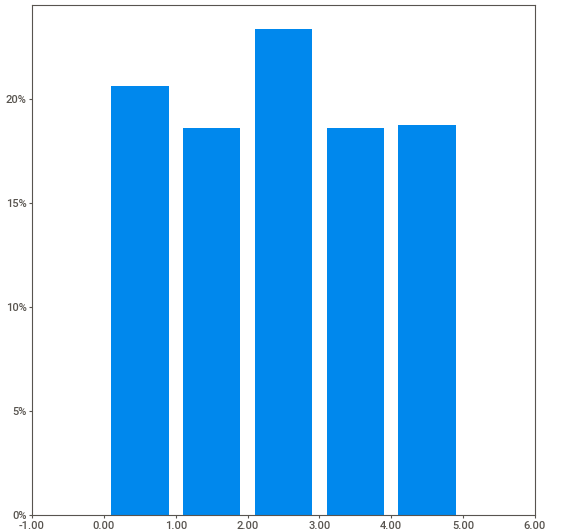
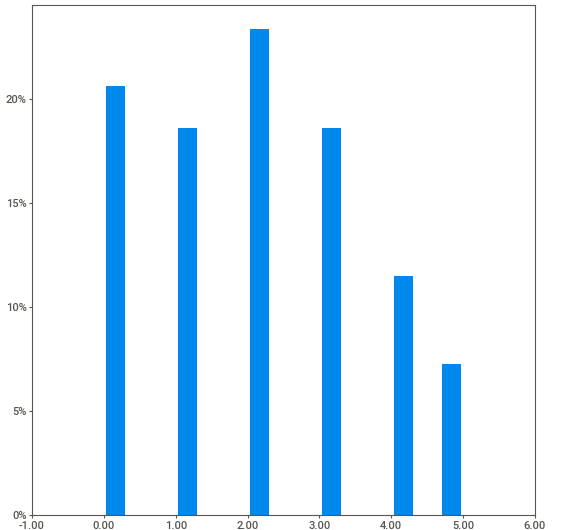
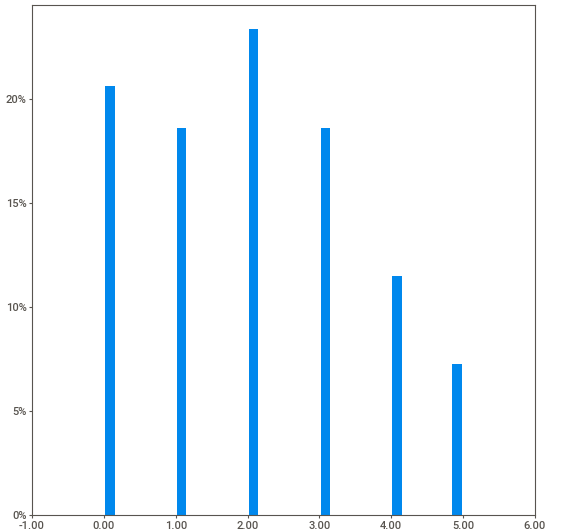
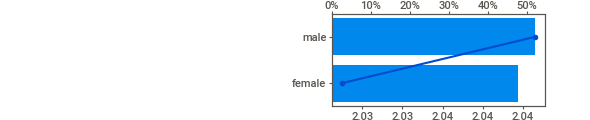
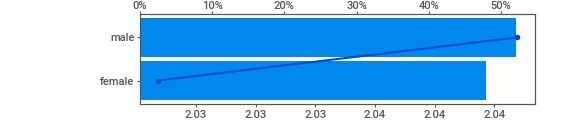
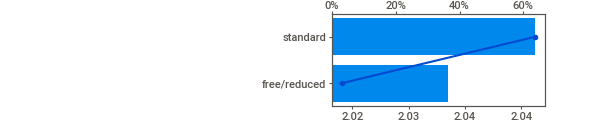
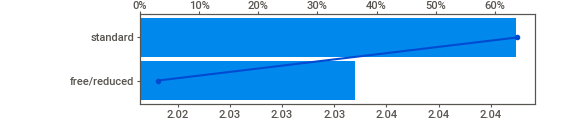
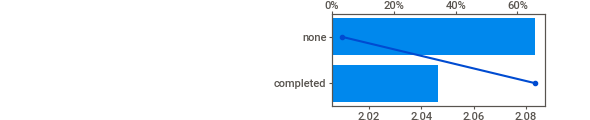
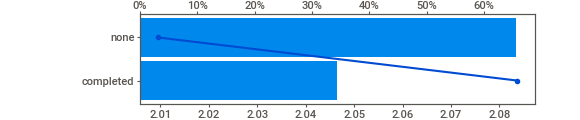
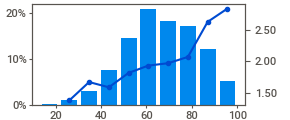
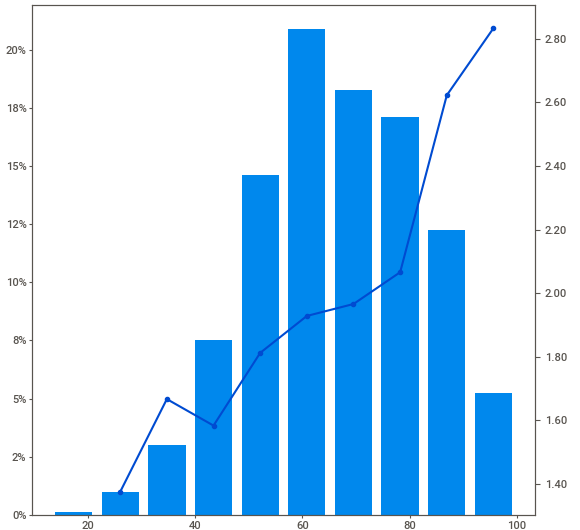
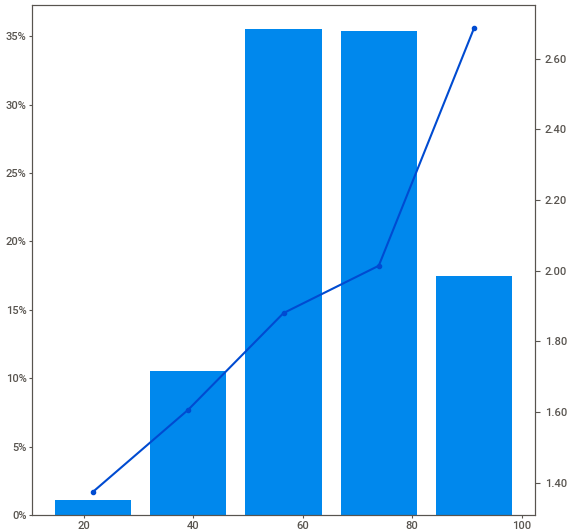
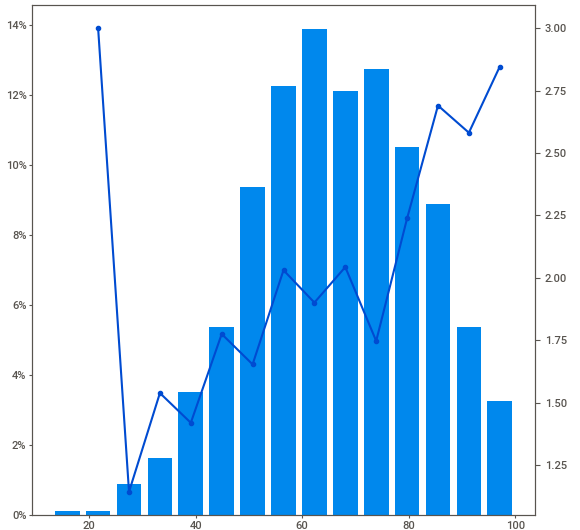
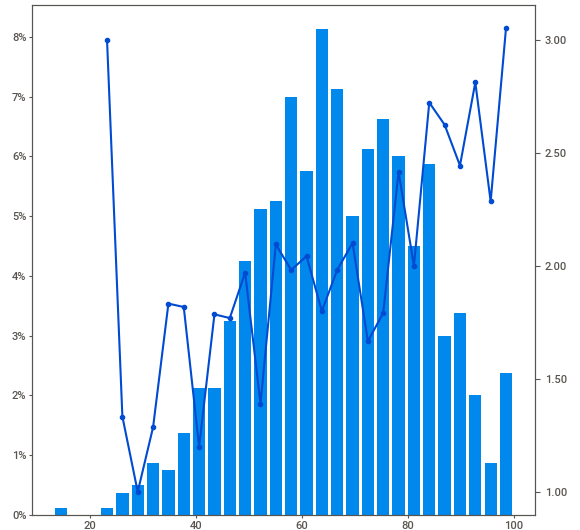
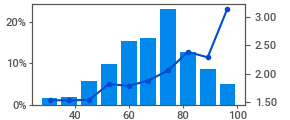
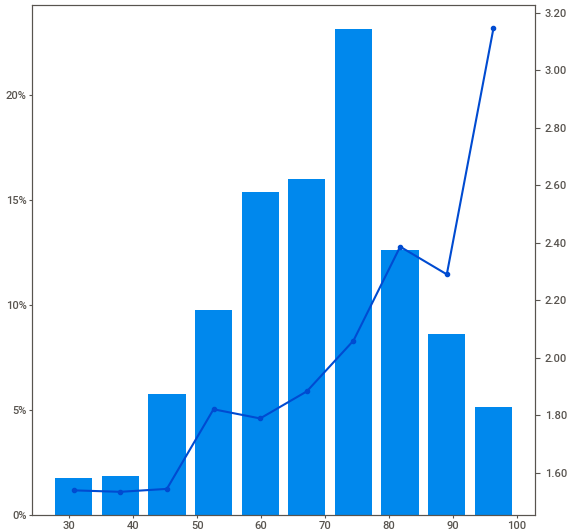
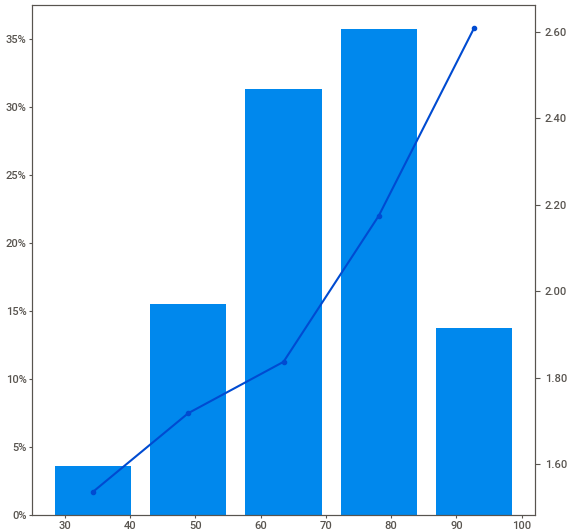
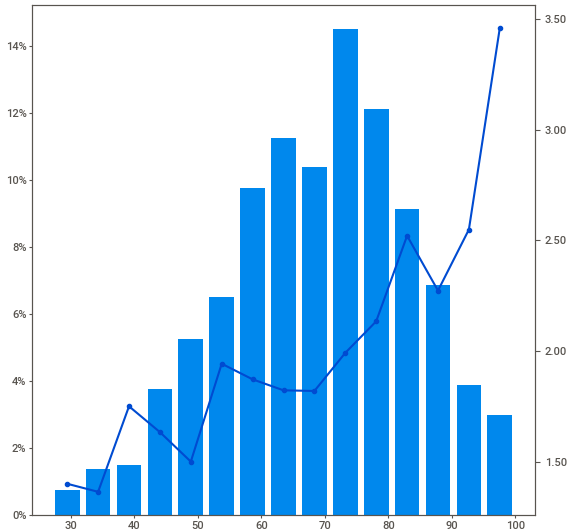
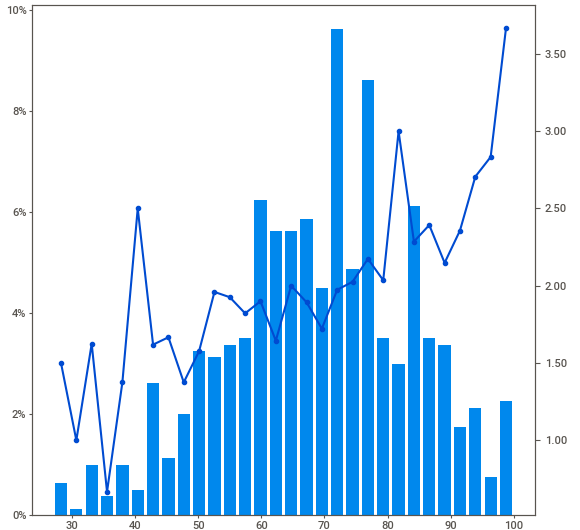
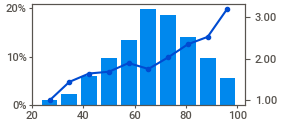
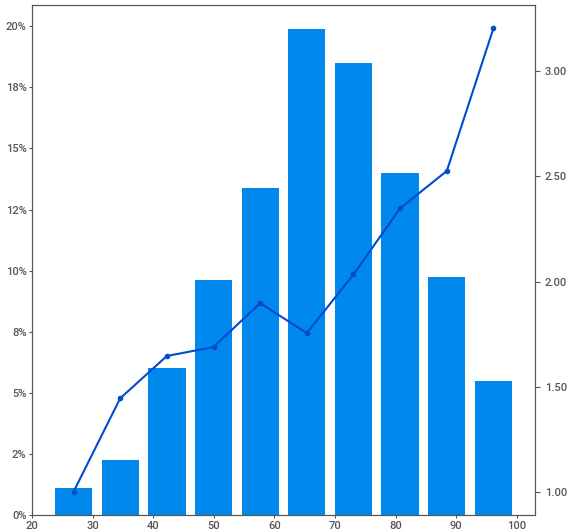
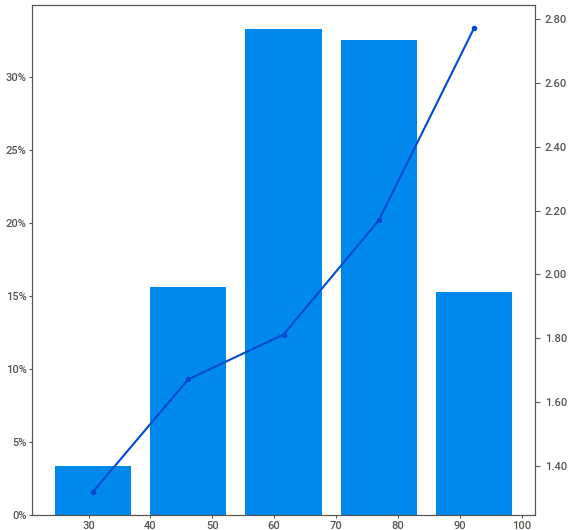
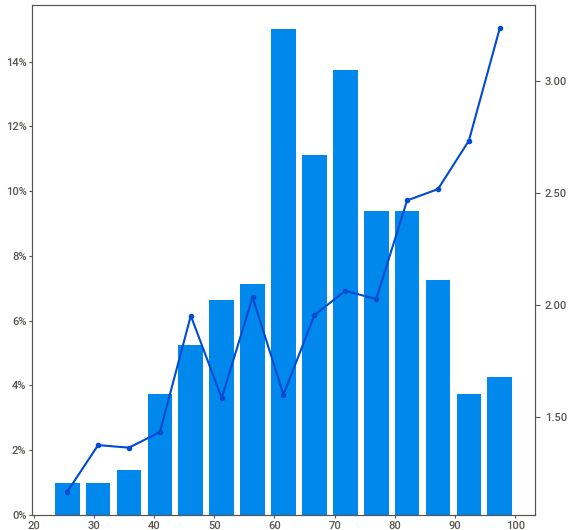
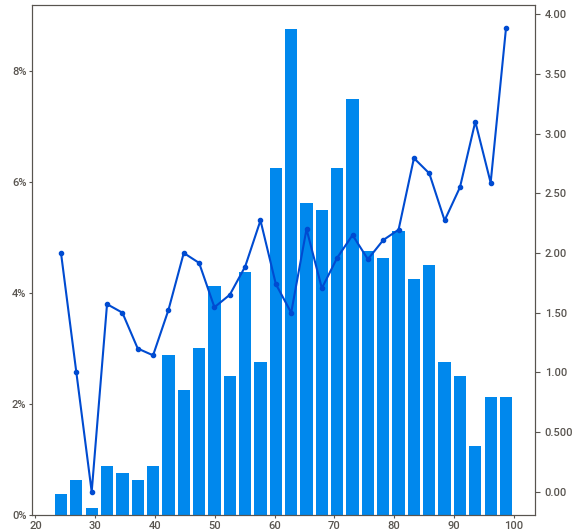
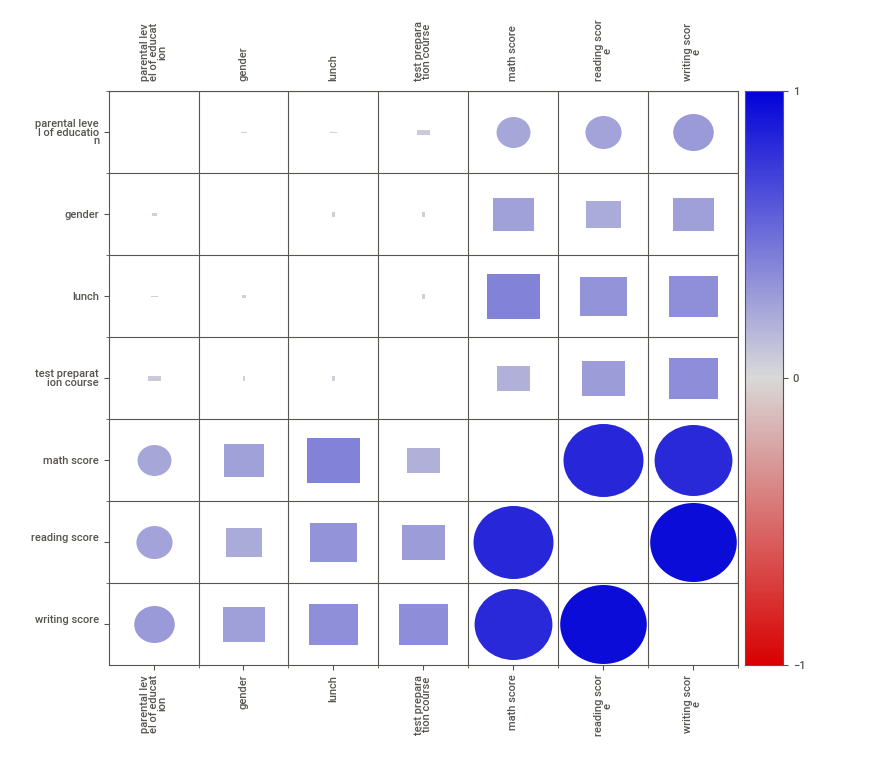
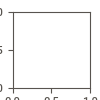

Report 'C:\Users\march\000 Treball Ju`yter 000\Hackathons\\-Hackathon_Talent_Squad_III_DS\train_EDA.html' was saved to storage.


In [8]:
#display the train report
acad_Yield_train_report.show_notebook( w=None, 
                                        h=None, 
                                        scale=None,
                                        layout='vertical',
                                        filepath='C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\\-Hackathon_Talent_Squad_III_DS\\train_EDA.html')


In [9]:
comparison_report = sv.compare([acad_Yield_train, "Training Data"], [acad_Yield_test, "Test Data"], "parental level of education", feature_config)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)



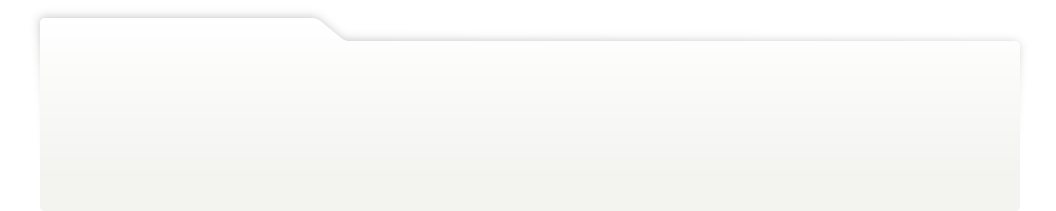
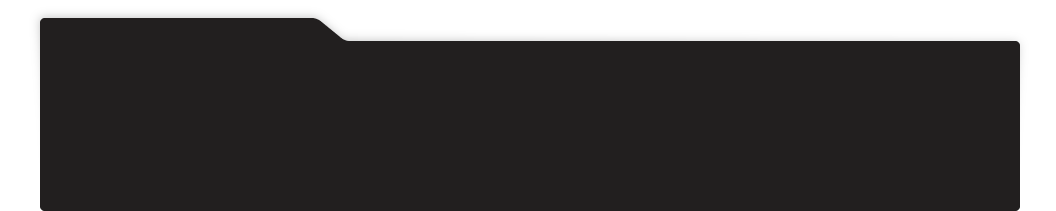
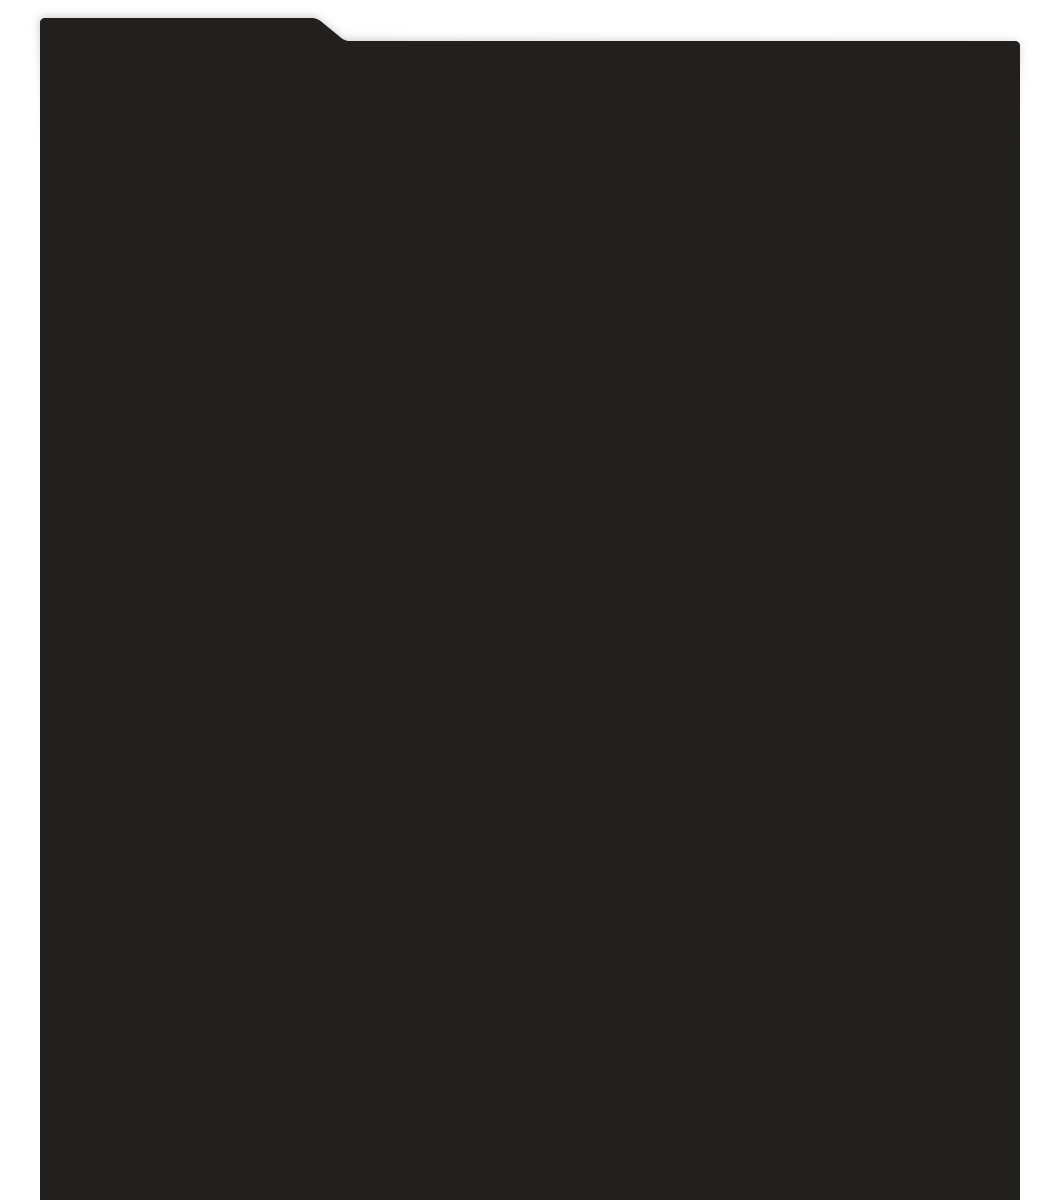
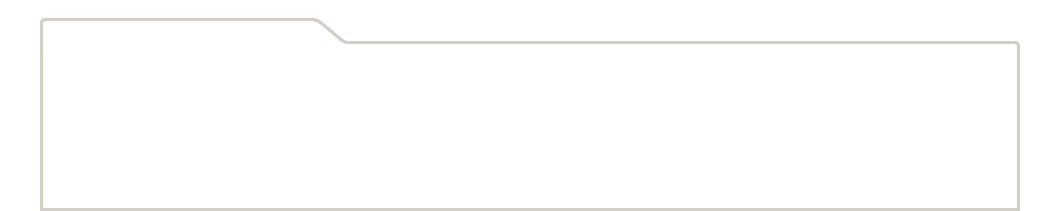
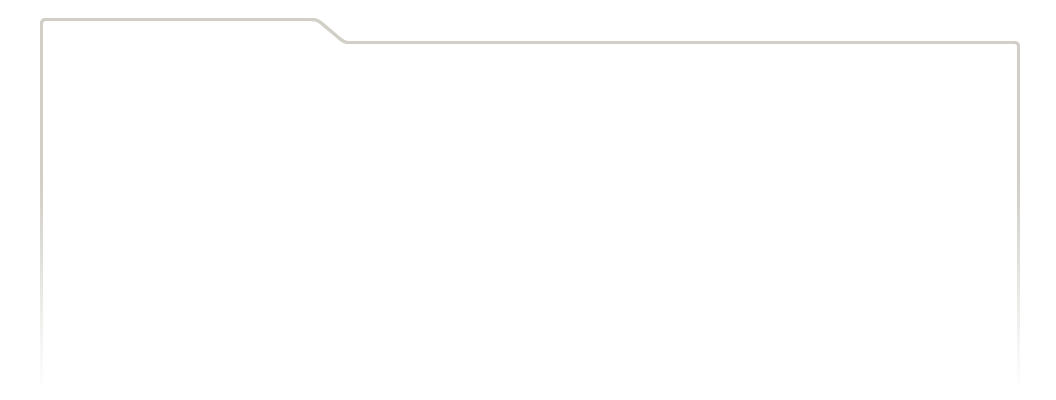
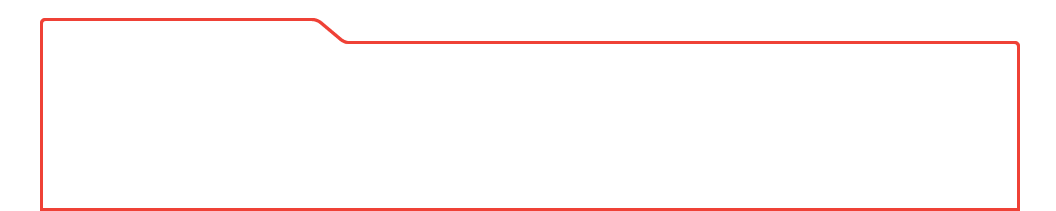
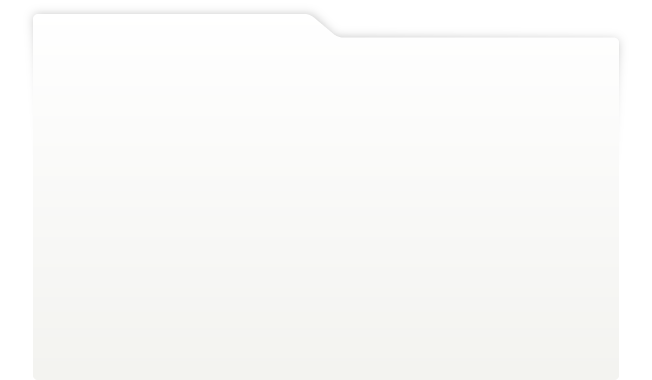
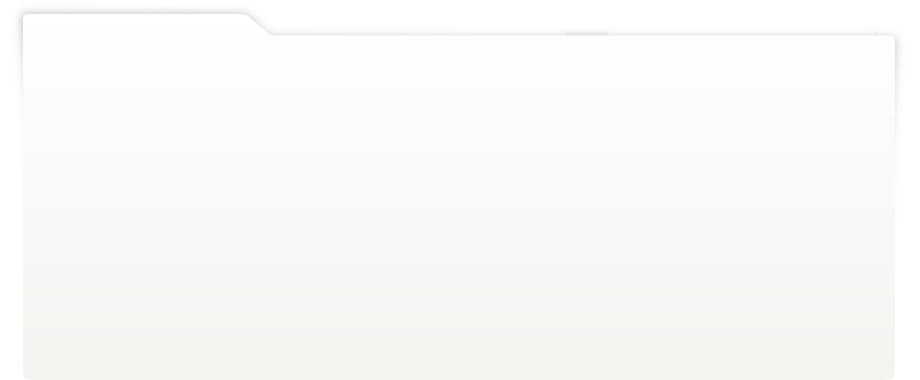
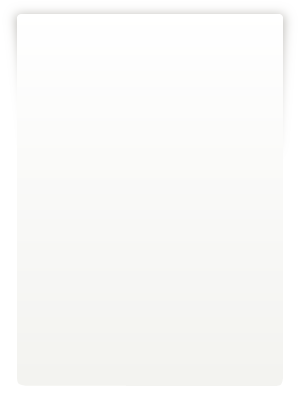
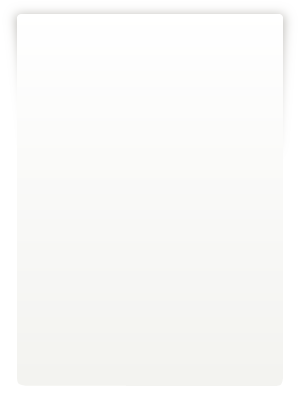
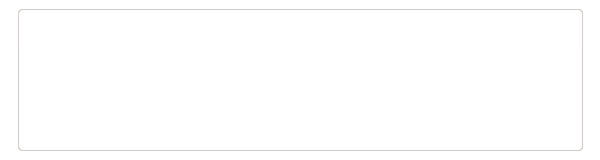
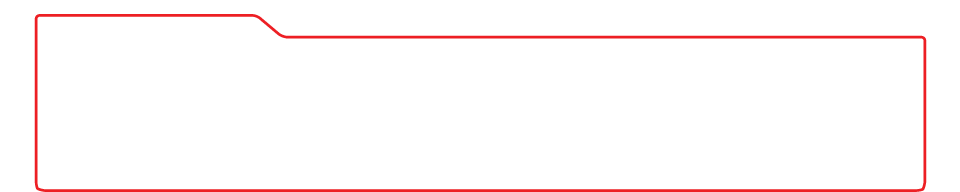
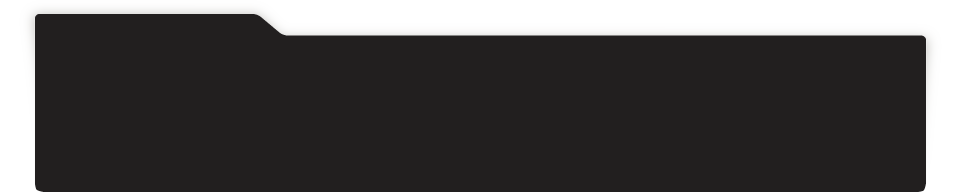
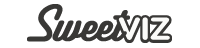
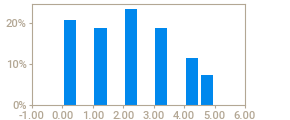
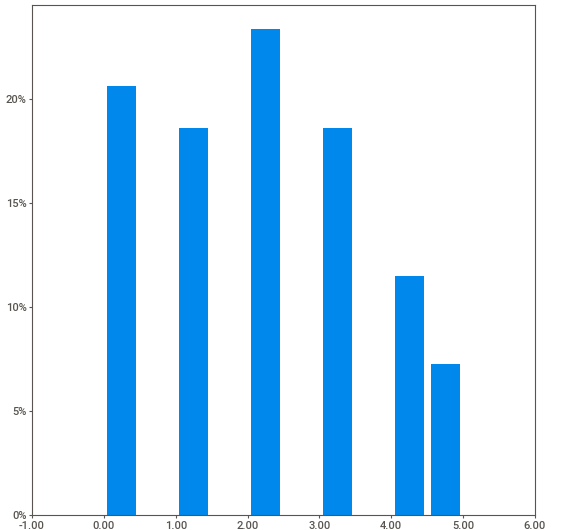
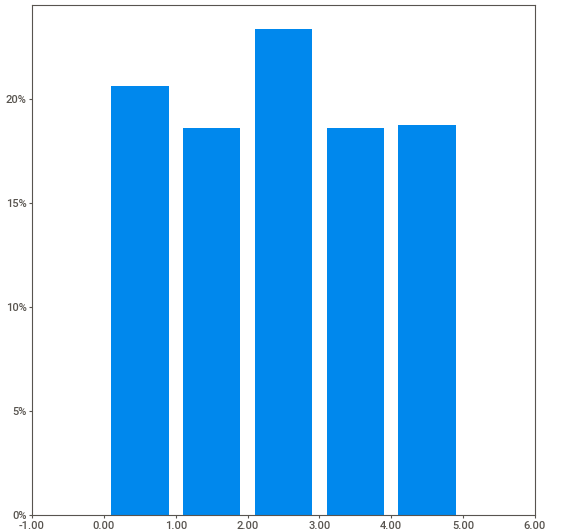
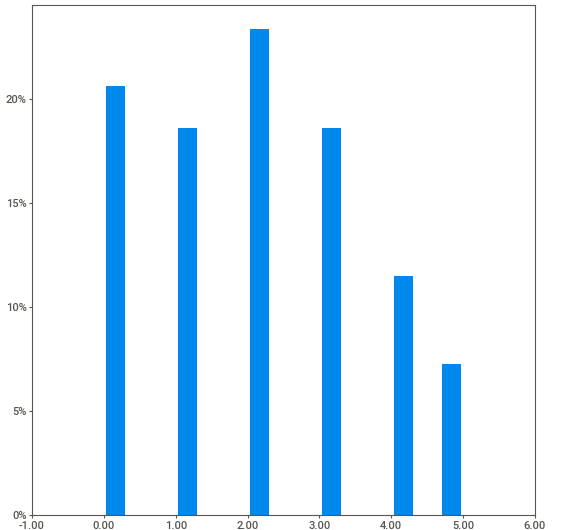
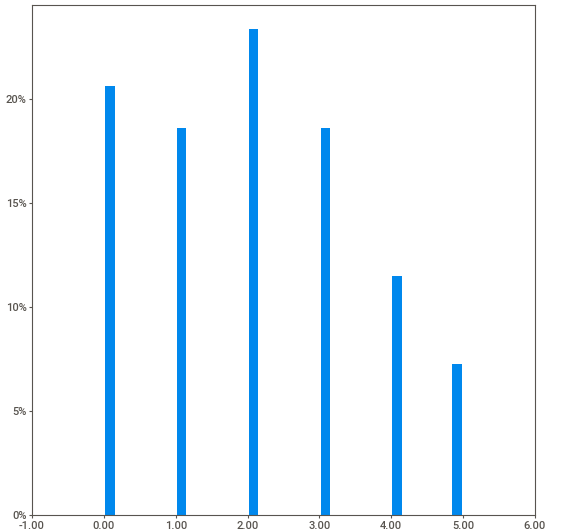
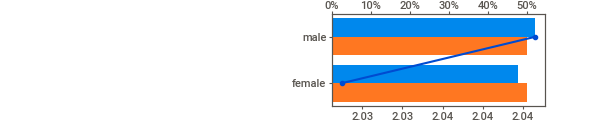
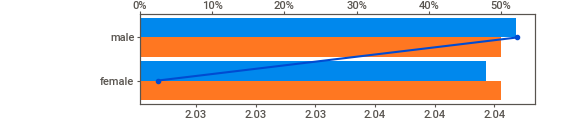
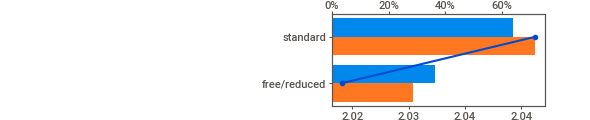
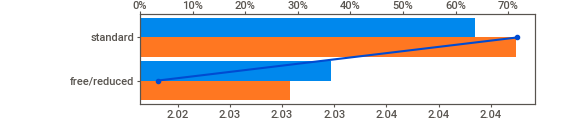
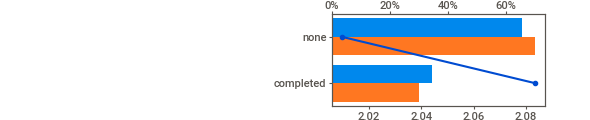
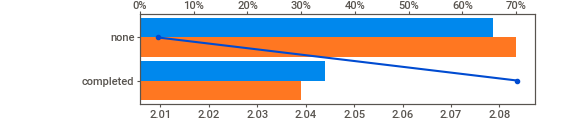
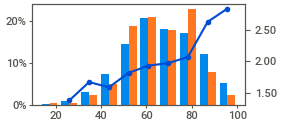
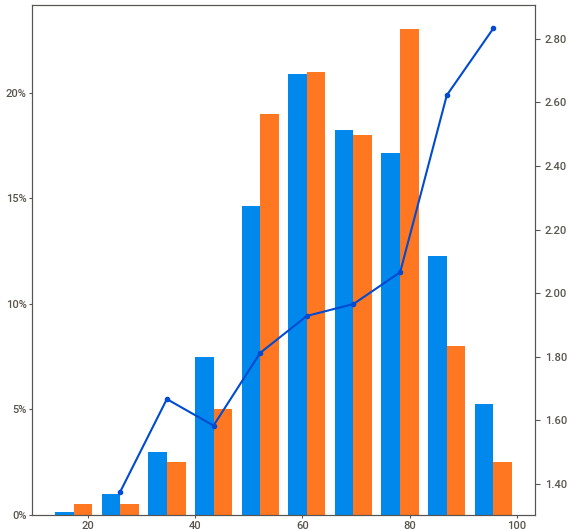
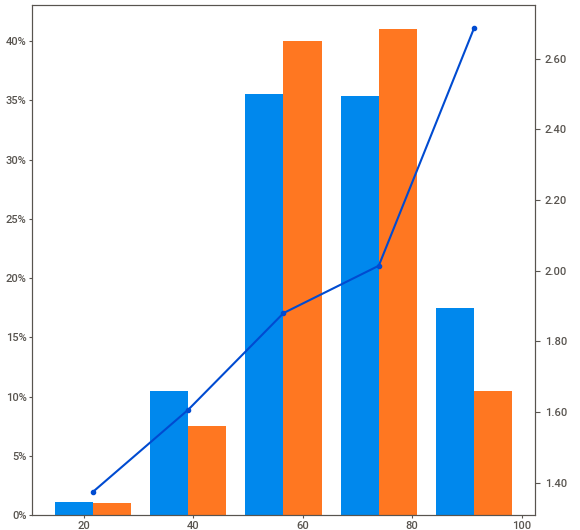
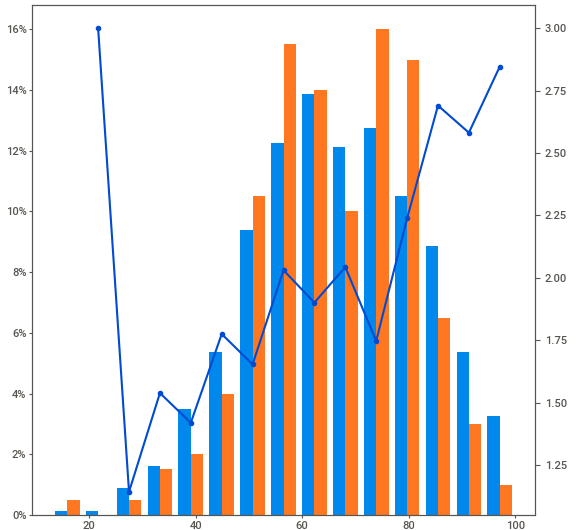
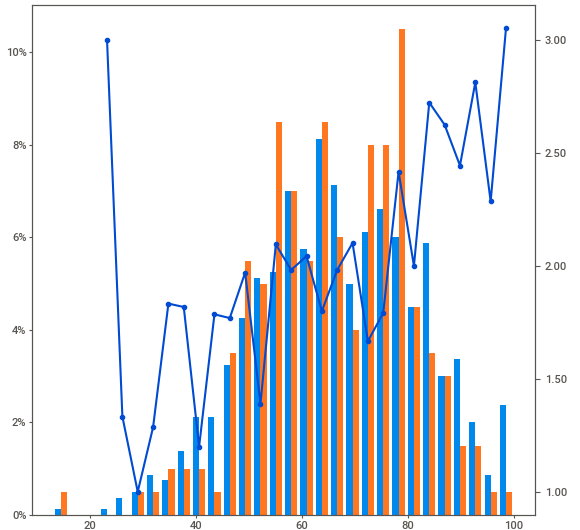
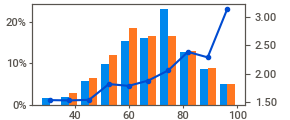
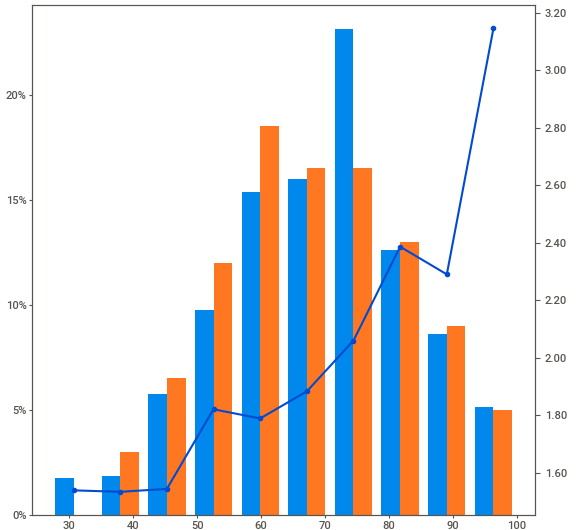
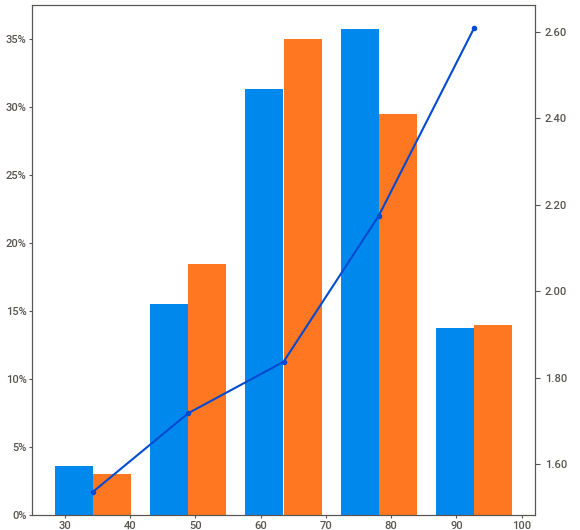
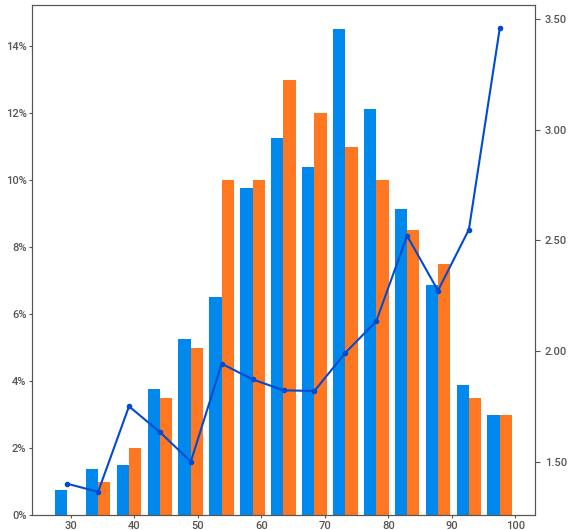
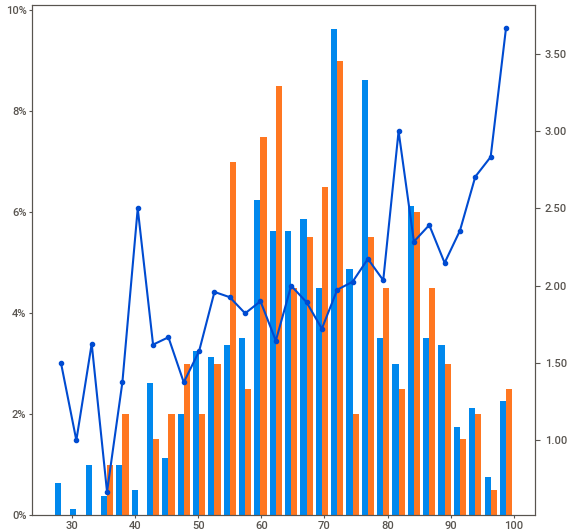
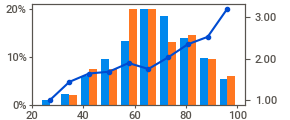
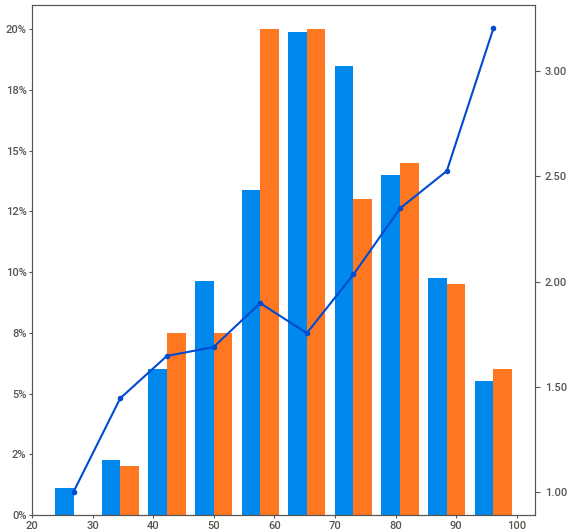
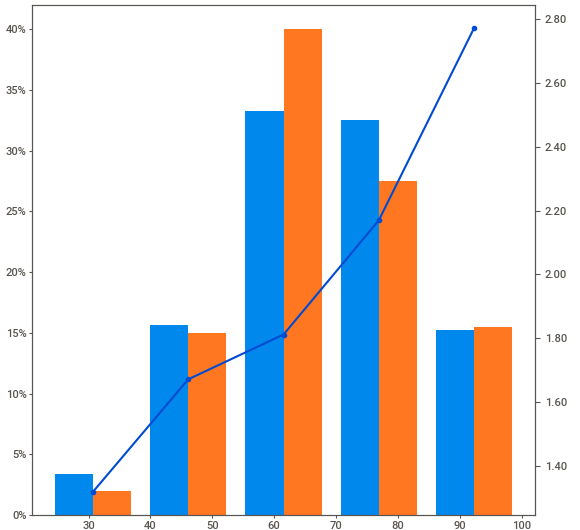
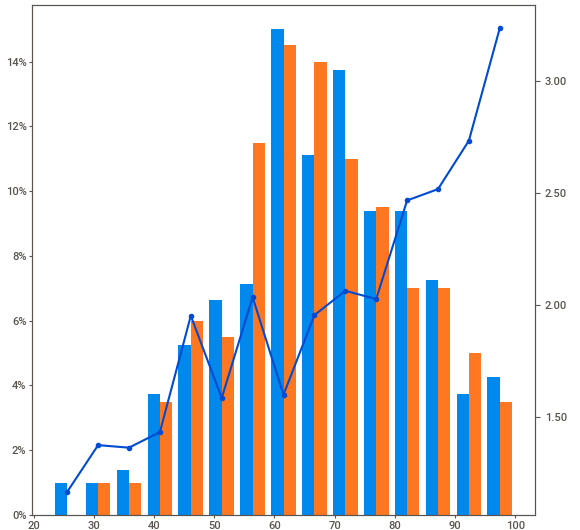
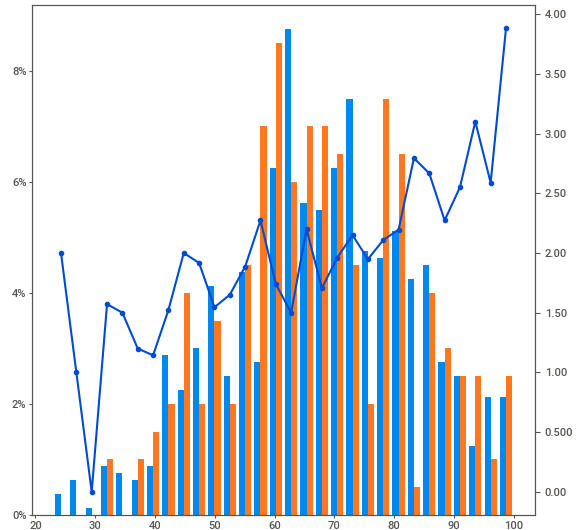
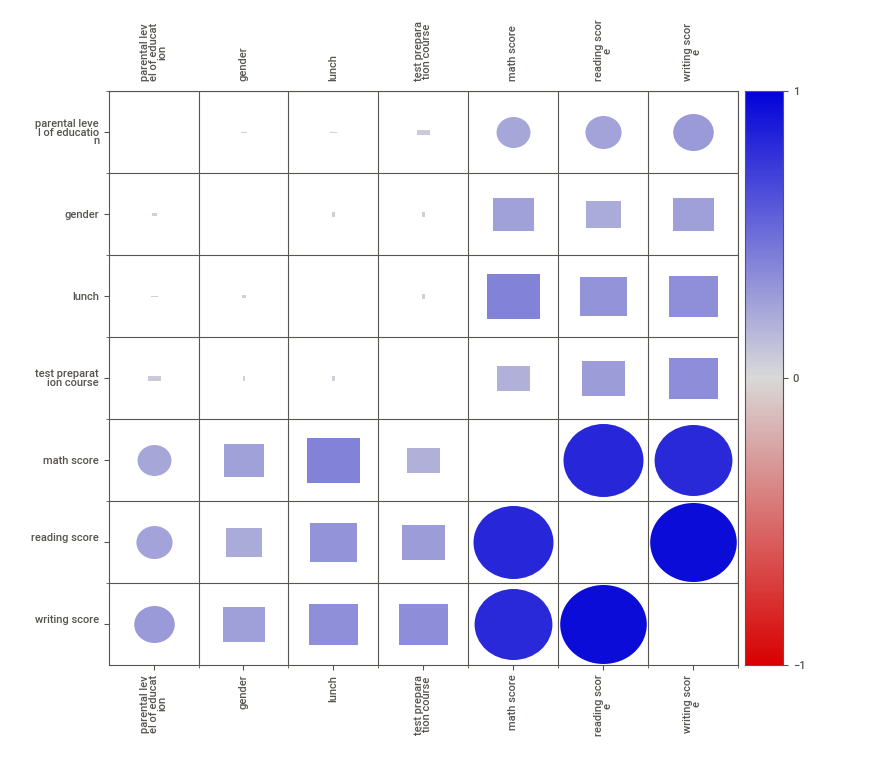
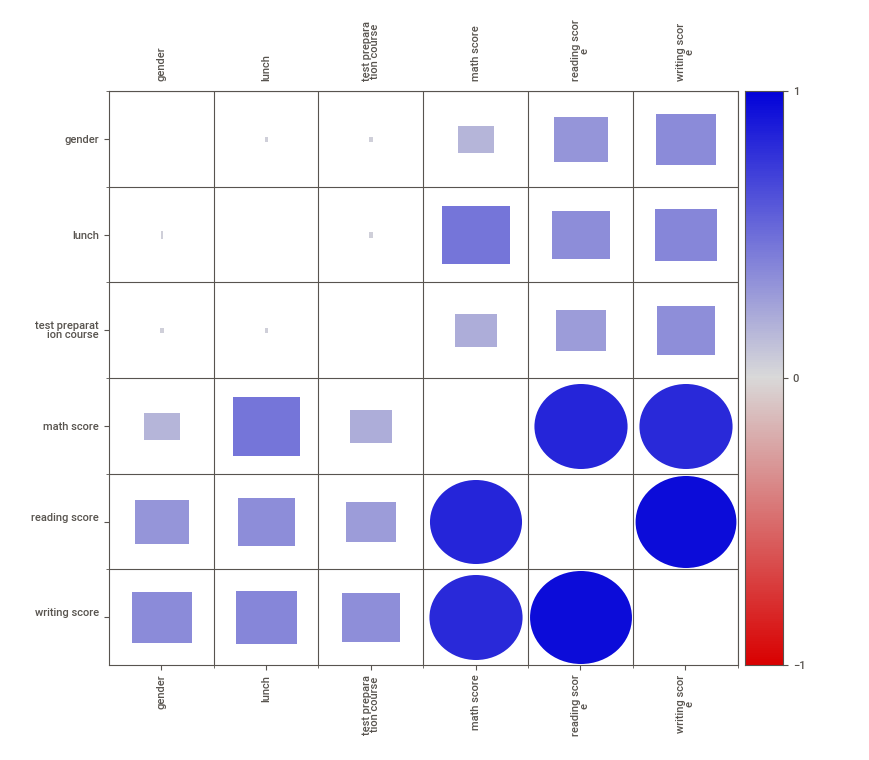

Report 'C:\Users\march\000 Treball Ju`yter 000\Hackathons\\-Hackathon_Talent_Squad_III_DS\test_vs_train_EDA.html' was saved to storage.


In [10]:
#display the train report
comparison_report.show_notebook( w=None, 
                                h=None, 
                                scale=None,
                                layout='vertical',
                                filepath='C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\\-Hackathon_Talent_Squad_III_DS\\test_vs_train_EDA.html')

## Gender

In [77]:
import math

In [78]:
df_sex_ple.log_male = math.log(df_sex_ple.male)

TypeError: cannot convert the series to <class 'float'>

In [79]:
df = acad_Yield_train

df_sex_ple = pd.crosstab(df['parental level of education'], df['gender'], margins=True)
#df_sex_ple['log_female' ]= [math.log(x) for x in df_sex_ple.female]
#df_sex_ple['log_male'] = [math.log(x) for x in df_sex_ple.male]

df_sex_ple


gender,female,male,All
parental level of education,,,
0,77,88,165
1,84,65,149
2,82,105,187
3,64,85,149
4,43,49,92
5,33,25,58
All,383,417,800


In [80]:
df_sex_ple = df_sex_ple.reset_index()
df_sex_ple.index.names = ['']
df_sex_ple

gender,parental level of education,female,male,All
,,,,
0,0,77,88,165
1,1,84,65,149
2,2,82,105,187
3,3,64,85,149
4,4,43,49,92
5,5,33,25,58
6,All,383,417,800


In [81]:
df_sex_ple.columns

Index(['parental level of education', 'female', 'male', 'All'], dtype='object', name='gender')

In [82]:
df_sex_ple.drop(6, axis=0, inplace=True)
df_sex_ple.drop('All', axis=1, inplace=True)


In [83]:

df_sex_ple['female_score'] =df_sex_ple['parental level of education']*df_sex_ple['female']

In [84]:

df_sex_ple['male_score'] =df_sex_ple['parental level of education']*df_sex_ple['male']
df_sex_ple

gender,parental level of education,female,male,female_score,male_score
,,,,,
0,0,77,88,0,0
1,1,84,65,84,65
2,2,82,105,164,210
3,3,64,85,192,255
4,4,43,49,172,196
5,5,33,25,165,125


In [91]:
trim = [(x-2.028720626631854)**2 for x in df_sex_ple['parental level of education']]
math.sqrt((trim * df_sex_ple.female).sum()/ df_sex_ple.female.sum())

1.5538078158958504

In [92]:
math.sqrt((trim * df_sex_ple.male).sum()/ df_sex_ple.male.sum())


1.4872499457856743

In [55]:
df_sex_ple.male_score.sum()/df_sex_ple.male.sum()

2.0407673860911273

In [54]:
df_sex_ple.female_score.sum()/df_sex_ple.female.sum()

2.028720626631854

No significance difference 

In [32]:
print (f'Female {df_sex_ple.iloc[:6,:2].female.mean()}  Male: {df_sex_ple.iloc[:6,:2].male.mean()}')
#df_sex_ple.male

Female 63.833333333333336  Male: 69.5


In [97]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})
plt.style.use('Solarize_Light2')

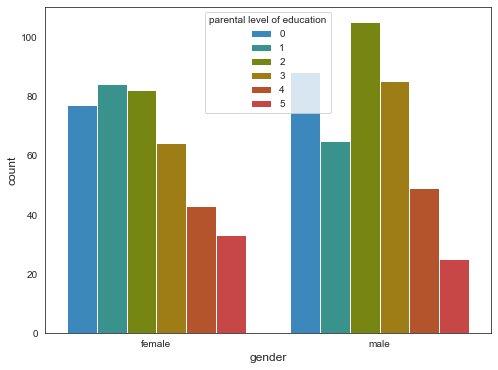

In [101]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='gender', hue='parental level of education', data=df);
plt.show()

Text(0.5, 1.0, 'count')

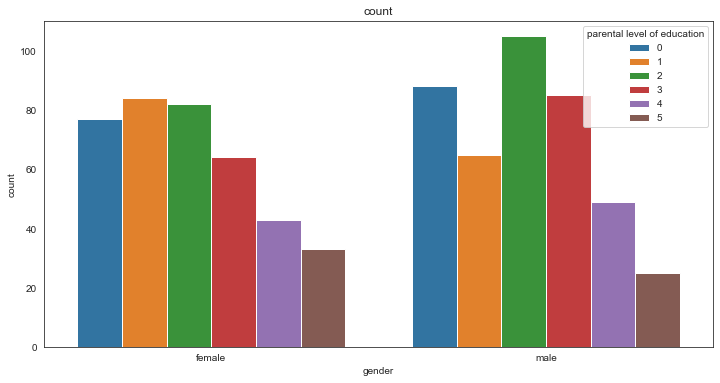

In [11]:
sns.set_style('white')
# algunos imports y comando para hacer plotting 
%matplotlib inline
import matplotlib.pyplot as plt 
# pip install seaborn // Si no está instalada esa librería 
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 6)
plt.tight_layout ()
a = sns.countplot(x='gender', hue='parental level of education', data=df)
a.set_title('count')
#a.set_title ('genre')

## Lunch

In [22]:
pd.crosstab(df['parental level of education'], df['lunch'], margins=True)

lunch,free/reduced,standard,All
parental level of education,,,
0,58,107,165
1,53,96,149
2,75,112,187
3,56,93,149
4,27,65,92
5,22,36,58
All,291,509,800


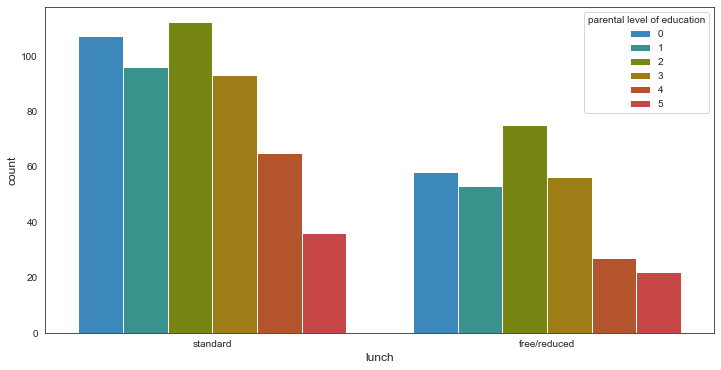

In [102]:

plt.rcParams['figure.figsize'] = (12, 6)
plt.tight_layout ()
a = sns.countplot(x='lunch', hue='parental level of education', data=df)
#a.set_title ('genre')

## Test preparation course

In [23]:
pd.crosstab(df['parental level of education'], df['test preparation course'], margins=True)

test preparation course,completed,none,All
parental level of education,,,
0,47,118,165
1,51,98,149
2,71,116,187
3,59,90,149
4,32,60,92
5,15,43,58
All,275,525,800


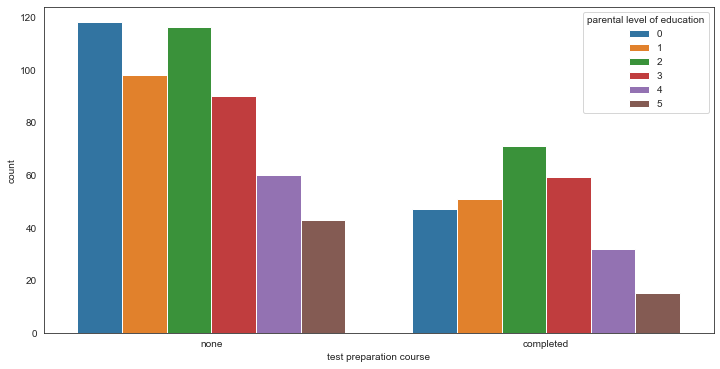

In [24]:

# algunos imports y comando para hacer plotting 
%matplotlib inline
import matplotlib.pyplot as plt 
# pip install seaborn // Si no está instalada esa librería 
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 6)
plt.tight_layout ()
a = sns.countplot(x='test preparation course', hue='parental level of education', data=df)

In [3]:
df = acad_Yield_train
df.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Text(0.5, 0.98, 'Pair plot of score with parental level of education differentiation')

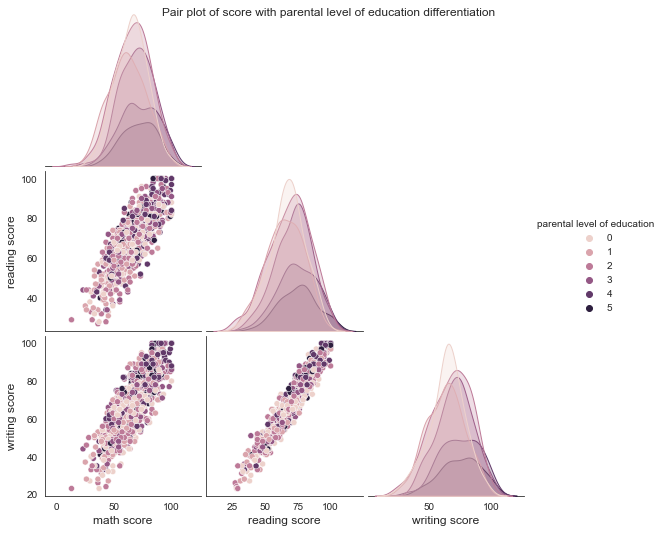

In [103]:
pairplot_education = sns.pairplot(df, corner=True,hue='parental level of education')
pairplot_education.fig.suptitle('Pair plot of score with parental level of education differentiation')

In [111]:
list_hues = ['gender', 'lunch', 'test preparation course']

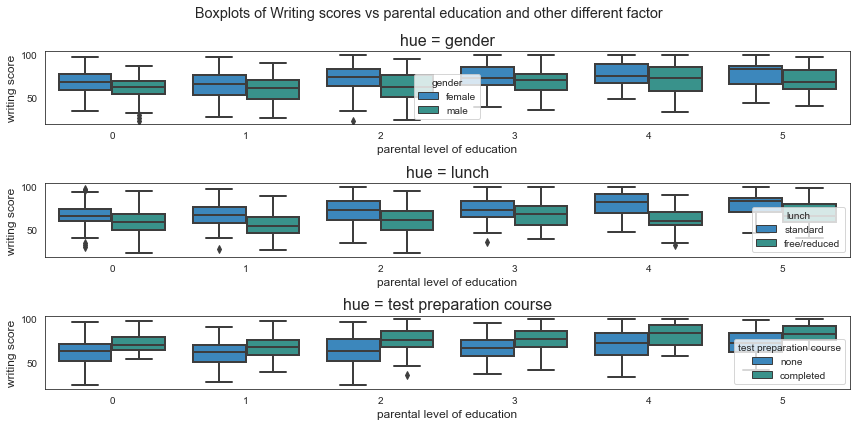

In [122]:
fig, axs = plt.subplots(nrows=3)
my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}

i=0
fig.suptitle('Boxplots of Writing scores vs parental education and other different factor' , fontsize="x-large")
fig.set_in_layout
for hue in list_hues:
    sns.boxplot(data=df, x="parental level of education", y="writing score", hue=hue, ax=axs[i] ).set_title (f'hue = {hue}') 
    i+=1
fig.tight_layout()

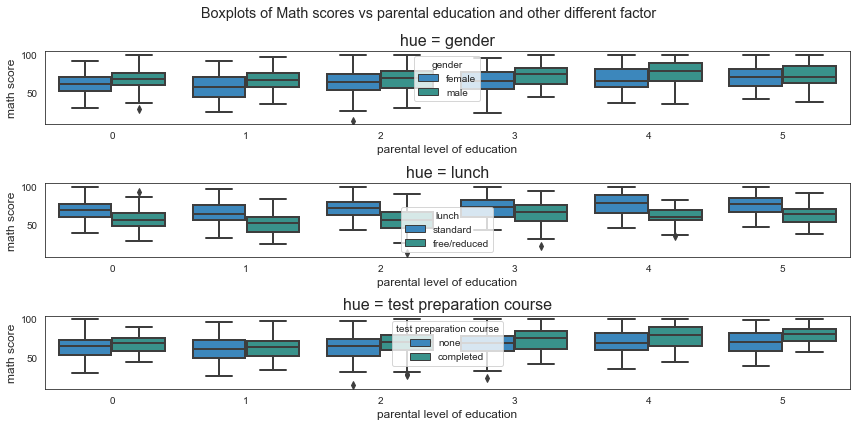

In [123]:
fig, axs = plt.subplots(nrows=3)

i=0
fig.suptitle('Boxplots of Math scores vs parental education and other different factor' , fontsize="x-large")
fig.set_in_layout
for hue in list_hues:
    sns.boxplot(data=df, x="parental level of education", y="math score", hue=hue, ax=axs[i] ).set_title (f'hue = {hue}') 
    i+=1
fig.tight_layout()

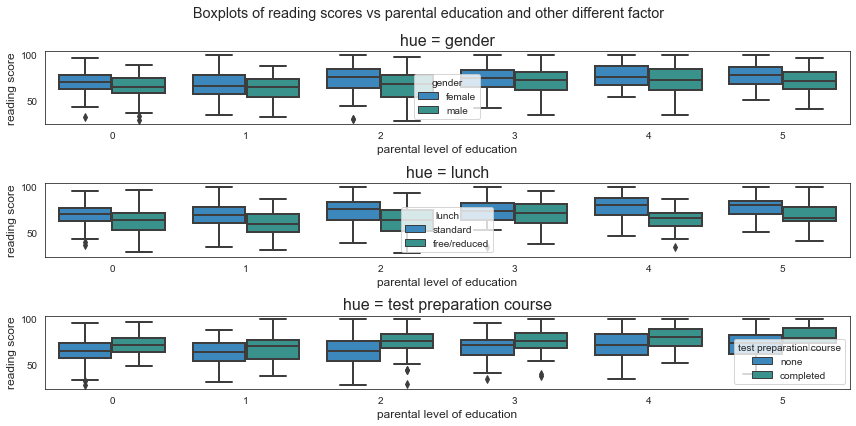

In [125]:
fig, axs = plt.subplots(nrows=3)

i=0
fig.suptitle('Boxplots of reading scores vs parental education and other different factor' , fontsize="x-large")
fig.set_in_layout
for hue in list_hues:
    sns.boxplot(data=df, x="parental level of education", y="reading score", hue=hue, ax=axs[i] ).set_title (f'hue = {hue}') 
    i+=1
fig.tight_layout()

In [ ]:
    
sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0])
sns.regplot(x='value', y='wage', data=df_melt, ax=axs[1])
sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])


<AxesSubplot:xlabel='parental level of education', ylabel='writing score'>

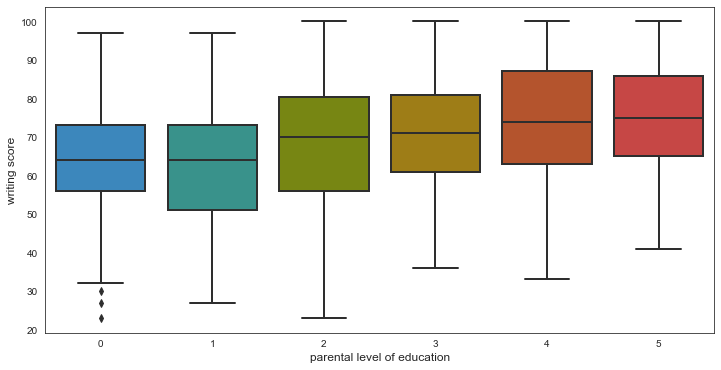

In [107]:
sns.boxplot(data=df, x="parental level of education", y="writing score") #hue="time",  style="time"

<AxesSubplot:xlabel='parental level of education', ylabel='reading score'>

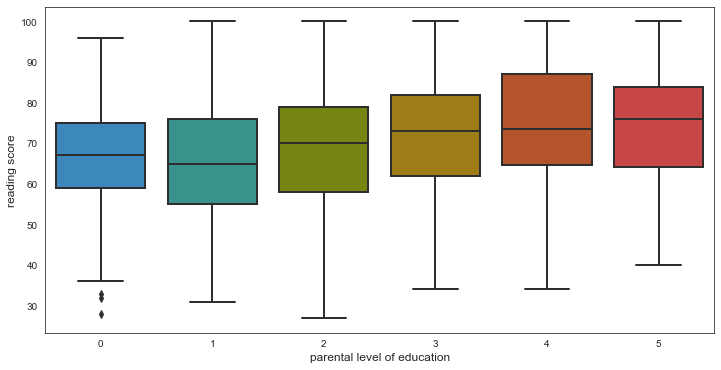

In [109]:
sns.boxplot(data=df, x="parental level of education", y="reading score") 

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

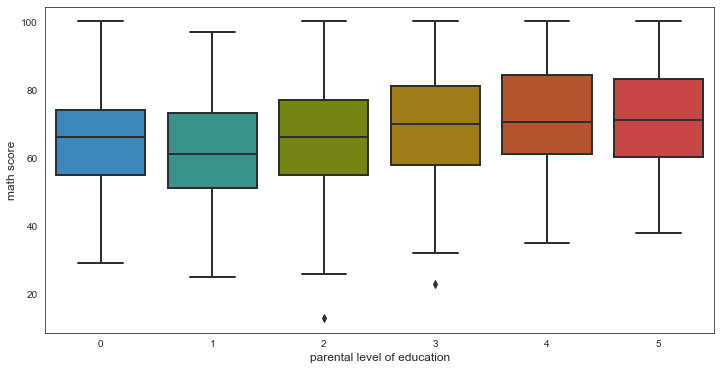

In [110]:
sns.boxplot(data=df, x="parental level of education", y="math score") 

In [104]:
df.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [129]:
df[(df.gender=='male')& (df.lunch=='standard') & (df['test preparation course']=='none')]

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
866,male,4,standard,none,79,57,58
91,male,1,standard,none,74,71,70
166,male,4,standard,none,66,64,58
44,male,0,standard,none,100,88,87
517,male,0,standard,none,49,36,32
...,...,...,...,...,...,...,...
132,male,2,standard,none,65,63,57
367,male,1,standard,none,64,67,64
103,male,0,standard,none,66,67,67
584,male,4,standard,none,100,84,88


gender: male --- lunch : standard --- test preparation course : none


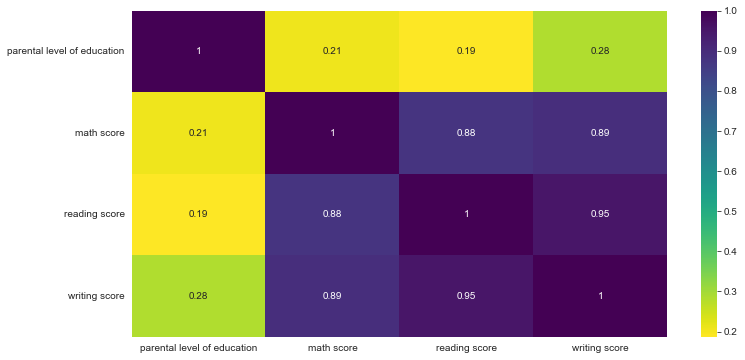

gender: male --- lunch : standard --- test preparation course : completed


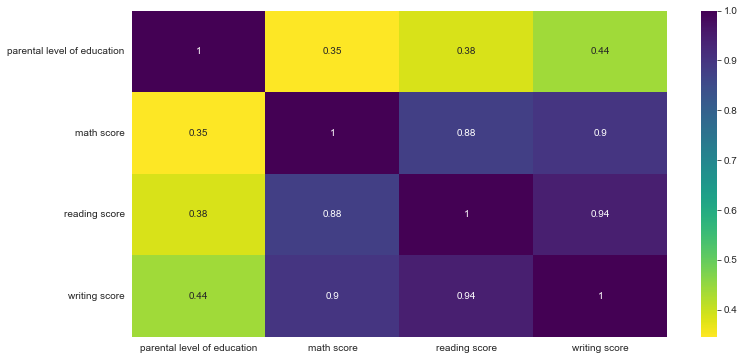

gender: male --- lunch : free/reduced --- test preparation course : none


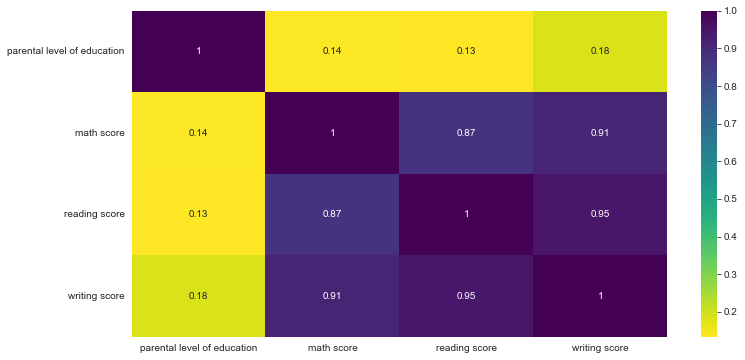

gender: male --- lunch : free/reduced --- test preparation course : completed


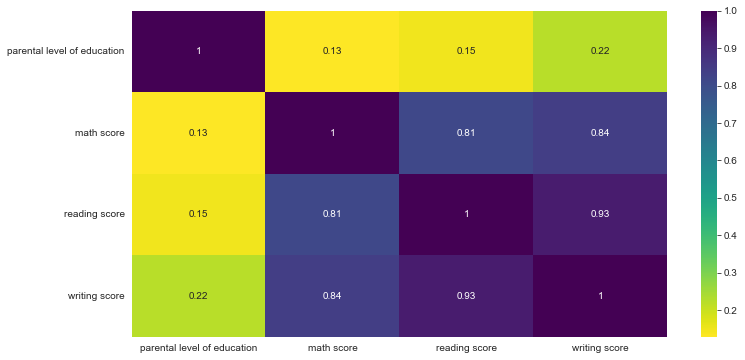

gender: female --- lunch : standard --- test preparation course : none


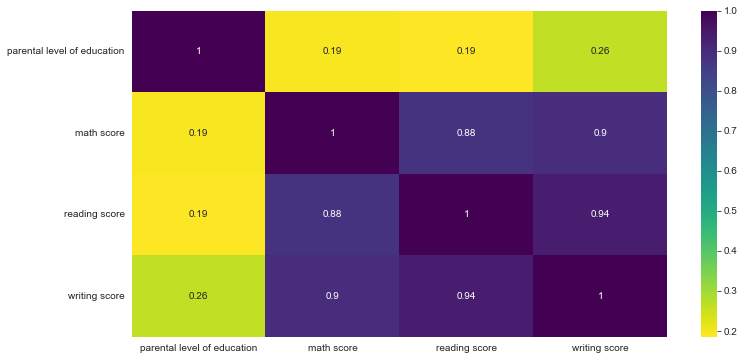

gender: female --- lunch : standard --- test preparation course : completed


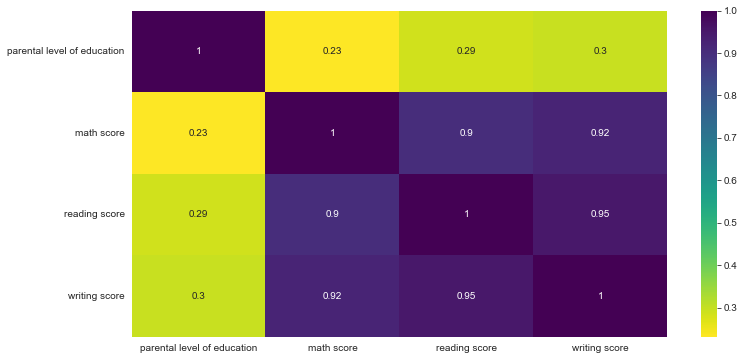

gender: female --- lunch : free/reduced --- test preparation course : none


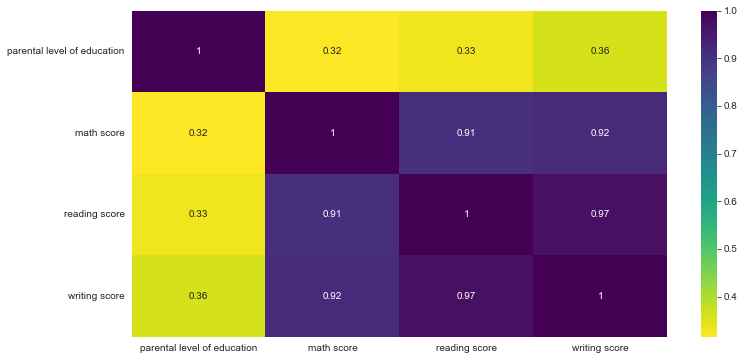

gender: female --- lunch : free/reduced --- test preparation course : completed


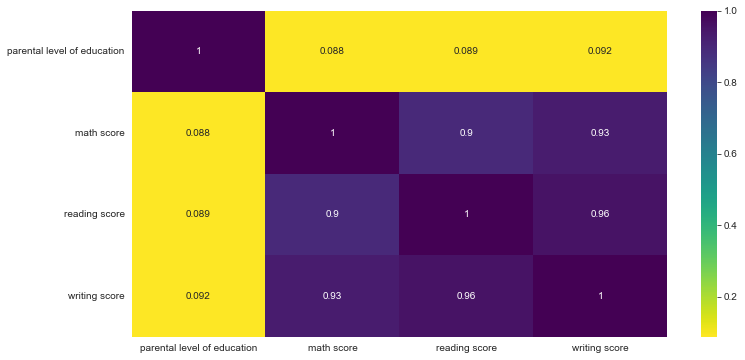

In [150]:
dict_df = {}
for gender in ['male','female']:
    dict_df[gender]={}

    for lunch in ['standard', 'free/reduced']:
        dict_df[gender][lunch]={}
        
        for test_preparation_course in ['none', 'completed']:
            dict_df[gender][lunch][test_preparation_course] = df[(df.gender==gender)& (df.lunch==lunch) & (df['test preparation course']==test_preparation_course)][['parental level of education', 'math score', 'reading score', 'writing score' ]]
            print (f'gender: {gender} --- lunch : {lunch} --- test preparation course : {test_preparation_course}')
            sns.heatmap(dict_df[gender][ lunch][test_preparation_course].corr(), cmap = 'viridis_r', annot=True)
            plt.show()

As seen from previous 

<AxesSubplot:>

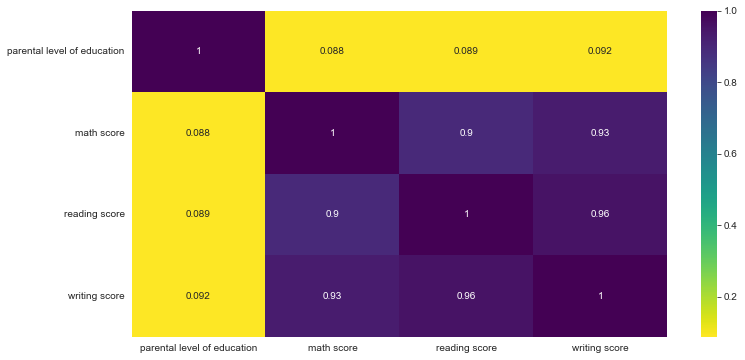

In [147]:

print (f'')
sns.heatmap(dict_df['female'][ 'free/reduced']['completed'].corr(), cmap = 'viridis_r', annot=True)

<AxesSubplot:>

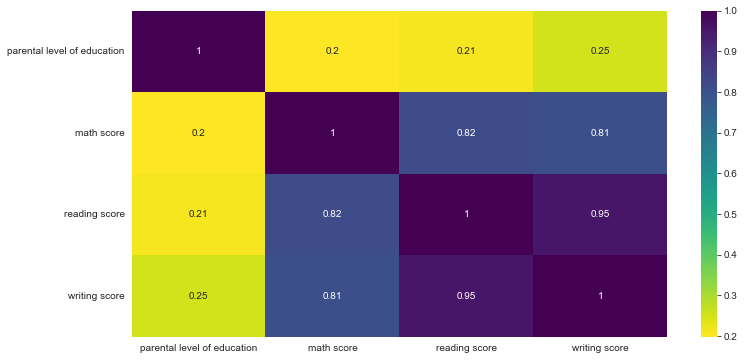

In [152]:
sns.heatmap(df[['parental level of education', 'math score','reading score', 'writing score',]].corr(), cmap = 'viridis_r', annot=True)

In [153]:
df.columns


Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

gender: male --- lunch : standard --- test preparation course : none
Average : 1.9024390243902438


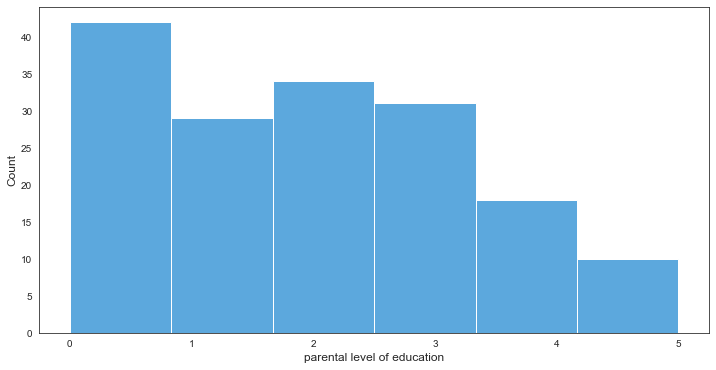

gender: male --- lunch : standard --- test preparation course : completed
Average : 2.202127659574468


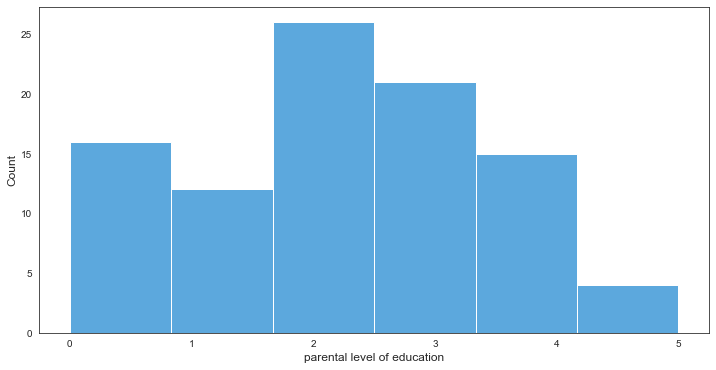

gender: male --- lunch : free/reduced --- test preparation course : none
Average : 2.1037735849056602


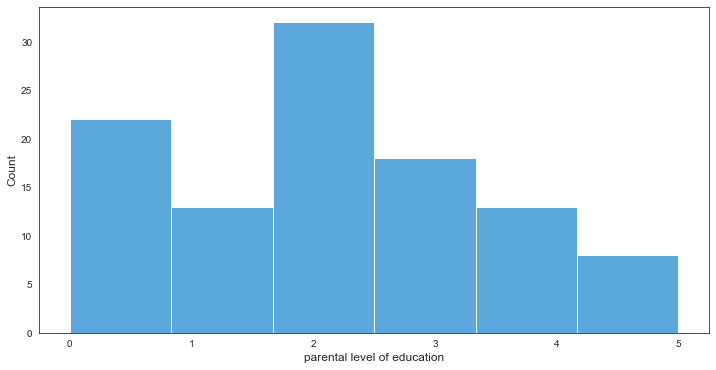

gender: male --- lunch : free/reduced --- test preparation course : completed
Average : 2.056603773584906


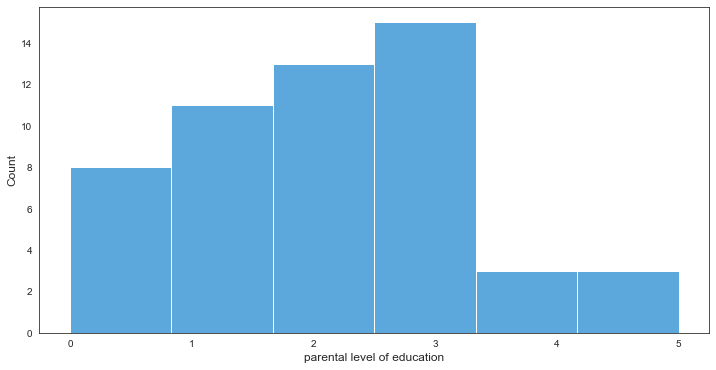

gender: female --- lunch : standard --- test preparation course : none
Average : 2.0365853658536586


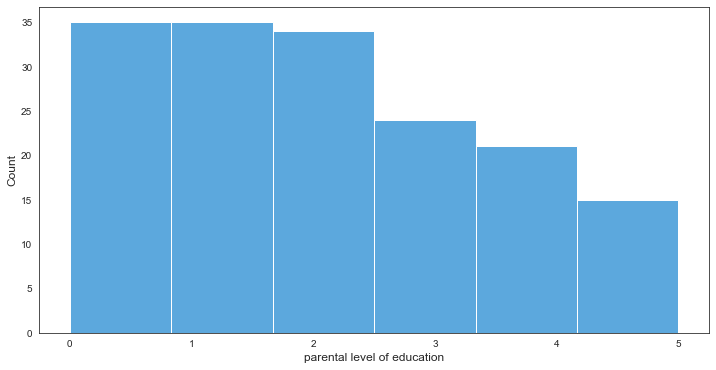

gender: female --- lunch : standard --- test preparation course : completed
Average : 2.1379310344827585


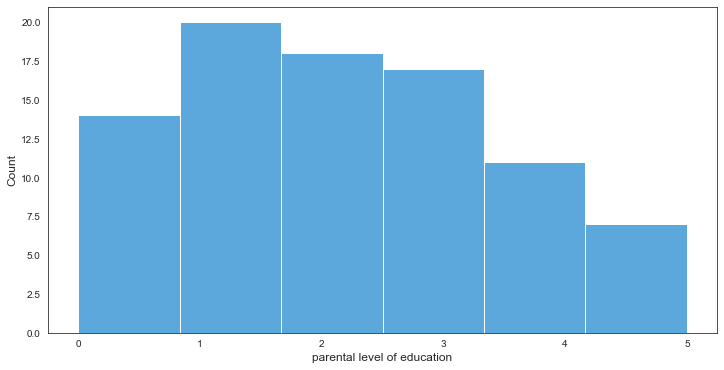

gender: female --- lunch : free/reduced --- test preparation course : none
Average : 2.043956043956044


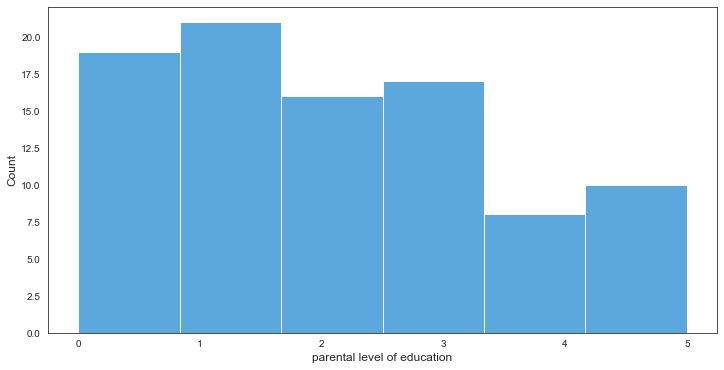

gender: female --- lunch : free/reduced --- test preparation course : completed
Average : 1.7317073170731707


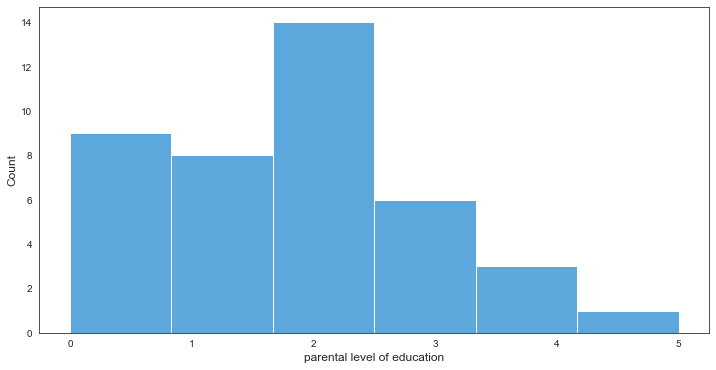

In [168]:


conditions=[]
averages=[]

for gender in ['male','female']:
    for lunch in ['standard', 'free/reduced']:
        for test_preparation_course in ['none', 'completed']:
            print (f'gender: {gender} --- lunch : {lunch} --- test preparation course : {test_preparation_course}')
            df_unique = dict_df[gender][lunch][test_preparation_course]['parental level of education']
            print (f'Average : {df_unique.sum()/len (df_unique)}')
            conditions.append(gender+'_'+lunch+ '_' + test_preparation_course )
            averages.append(df_unique.sum()/len (df_unique))
            sns.histplot (data =df_unique, bins=6)
            plt.show()
average_df =pd.DataFrame ({'Types': conditions, 'Averages': averages})

In [169]:
df.gender.count()

800

In [170]:
df.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [171]:
average_df.sort_values('Averages')

,Types,Averages
7,female_free/reduced_completed,1.731707
0,male_standard_none,1.902439
4,female_standard_none,2.036585
6,female_free/reduced_none,2.043956
3,male_free/reduced_completed,2.056604
2,male_free/reduced_none,2.103774
5,female_standard_completed,2.137931
1,male_standard_completed,2.202128


In [167]:
print (f"Global average on parental level of education: {df[ 'parental level of education'].sum()/df[ 'parental level of education'].count()}") 

Global average on parental level of education: 2.035


Regarding different conditions of students, there is some points to higlight:
* Female students who has reduced or free lunch conditions and completed the courses have parents with a lower level of education. This don't happen for males. 

gender: male --- lunch : standard --- test preparation course : none


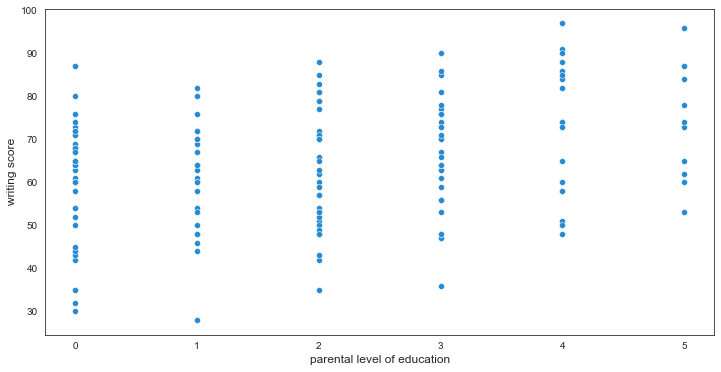

gender: male --- lunch : standard --- test preparation course : completed


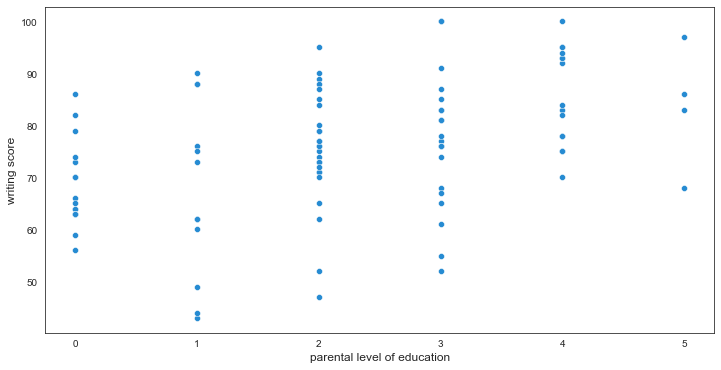

gender: male --- lunch : free/reduced --- test preparation course : none


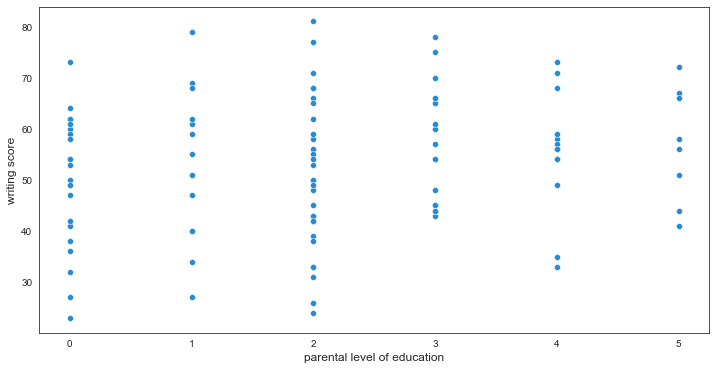

gender: male --- lunch : free/reduced --- test preparation course : completed


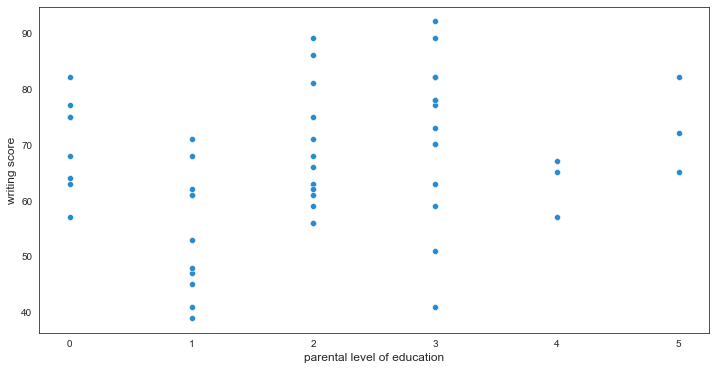

gender: female --- lunch : standard --- test preparation course : none


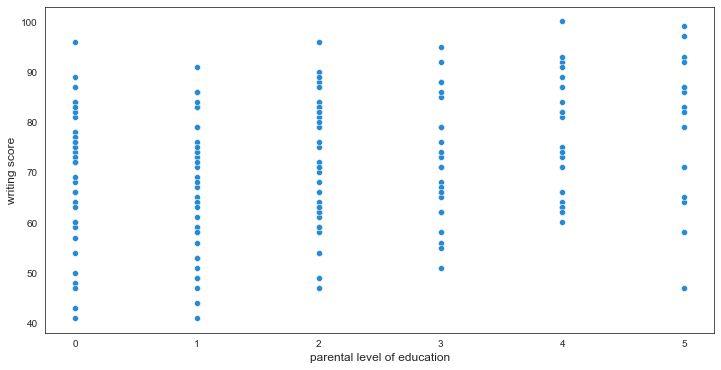

gender: female --- lunch : standard --- test preparation course : completed


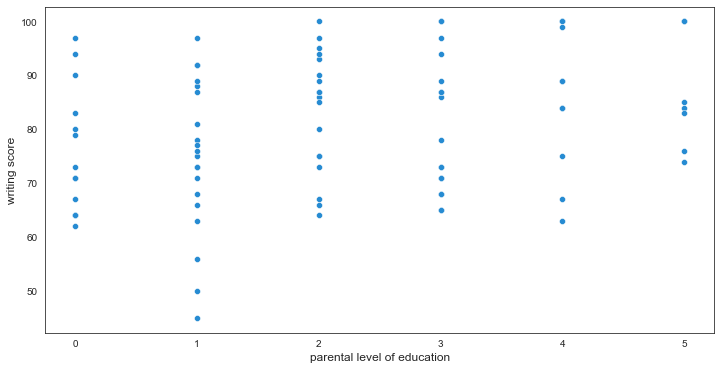

gender: female --- lunch : free/reduced --- test preparation course : none


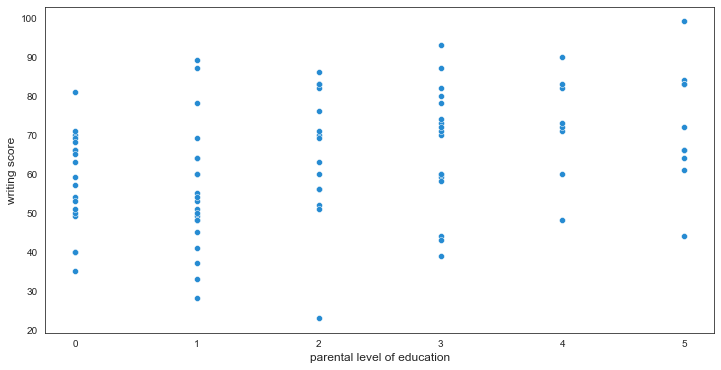

gender: female --- lunch : free/reduced --- test preparation course : completed


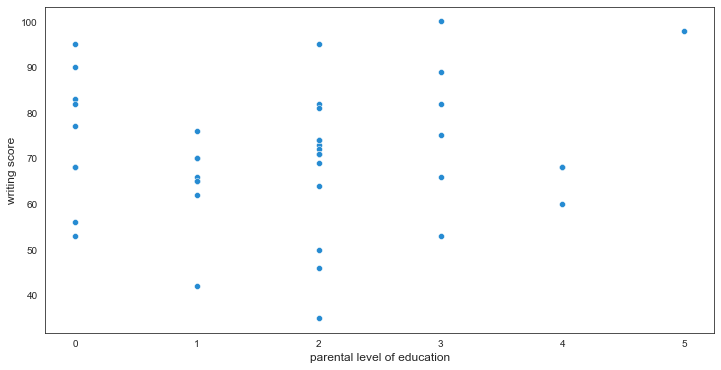

In [175]:
for gender in ['male','female']:
    for lunch in ['standard', 'free/reduced']:
        for test_preparation_course in ['none', 'completed']:
            print (f'gender: {gender} --- lunch : {lunch} --- test preparation course : {test_preparation_course}')
            df_unique = dict_df[gender][lunch][test_preparation_course]
            sns.scatterplot (data =df_unique, x='parental level of education', y= 'writing score')
            plt.show()

In [179]:
def df_dummies (df):
    new_df_with_dum = pd.get_dummies (acad_Yield_train,
                columns= ['gender',  
                'lunch',
                'test preparation course' ] 
                )
    for i in ['gender_male', 'lunch_standard', 'test preparation course_none']:
        new_df_with_dum.drop(i, axis=1, inplace=True)
    return new_df_with_dum

def avg_num_colmns (df):
    new_df= df.copy()
    new_df['average_score'] = (new_df['math score'] + new_df['reading score'] + new_df['writing score'])/3
    new_df.drop(['math score', 'reading score','writing score'], axis= 1, inplace = True)
    return new_df

def max_num_colmns (df):
    new_df= df.copy()
    new_df['max_score'] = [max (x) for x in zip(new_df['math score'] , new_df['reading score'] , new_df['writing score'])]
    new_df.drop(['math score', 'reading score','writing score'], axis= 1, inplace = True)
    return new_df


In [40]:

   def min_num_colmns (df):
        new_df= df.copy()
        new_df['min_score'] = [min (x) for x in zip(new_df['math score'] , new_df['reading score'] , new_df['writing score'])]
        new_df.drop(['math score', 'reading score','writing score'], axis= 1, inplace = True)
        return new_df 

In [180]:
acad_Yield_train_dum =  df_dummies(acad_Yield_train)


In [181]:
acad_Yield_train_dum.head(5)

,parental level of education,math score,reading score,writing score,gender_female,lunch_free/reduced,test preparation course_completed
764,1,62,76,67,1,0,0
866,4,79,57,58,0,0,0
208,2,77,86,84,1,0,0
337,0,45,46,49,1,1,0
323,3,82,83,85,0,0,1


In [38]:
acad_Yield_train_dum_max = max_num_colmns(acad_Yield_train_dum)
acad_Yield_train_dum_max

,parental level of education,gender_female,lunch_free/reduced,test preparation course_completed,max_score
764,1,1,0,0,76
866,4,0,0,0,79
208,2,1,0,0,86
337,0,1,1,0,49
323,3,0,0,1,85
...,...,...,...,...,...
272,0,0,0,1,74
853,2,0,0,1,72
894,3,0,0,0,86
179,0,0,0,1,89


In [18]:
acad_Yield_train_dum_avg = avg_num_colmns(acad_Yield_train_dum)
acad_Yield_train_dum_avg

,parental level of education,gender_female,lunch_free/reduced,test preparation course_completed,average_score
764,1,1,0,0,68.333333
866,4,0,0,0,64.666667
208,2,1,0,0,82.333333
337,0,1,1,0,46.666667
323,3,0,0,1,83.333333
...,...,...,...,...,...
272,0,0,0,1,70.000000
853,2,0,0,1,72.000000
894,3,0,0,0,80.333333
179,0,0,0,1,87.333333


In [14]:
acad_Yield_train_dum.columns

Index(['parental level of education', 'math score', 'reading score',
       'writing score', 'gender_female', 'gender_male', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

In [21]:
acad_Yield_train_math=acad_Yield_train.copy()
acad_Yield_train_math.drop(['reading score', 'writing score'], axis= 1, inplace= True)
acad_Yield_train_math

,gender,parental level of education,lunch,test preparation course,math score
764,female,1,standard,none,62
866,male,4,standard,none,79
208,female,2,standard,none,77
337,female,0,free/reduced,none,45
323,male,3,standard,completed,82
...,...,...,...,...,...
272,male,0,standard,completed,74
853,male,2,standard,completed,72
894,male,3,standard,none,86
179,male,0,standard,completed,89


In [177]:
acad_Yield_train_dum.head(5)

NameError: name 'acad_Yield_train_dum' is not defined

In [25]:
X = acad_Yield_train_dum.drop('parental level of education', axis = 1).values
y = acad_Yield_train_dum['parental level of education']

numerical_cols=['math score', 
                'reading score',       
                'writing score', 
                'gender_female', 
                'lunch_free/reduced',       
                'test preparation course_completed'
                ]


In [26]:
scaler = preprocessing.StandardScaler()
acad_Yield_train_std = scaler.fit_transform(X)
acad_Yield_train_std = pd.DataFrame(acad_Yield_train_std, columns =numerical_cols)

In [27]:
acad_Yield_train_std

,math score,reading score,writing score,gender_female,lunch_free/reduced,test preparation course_completed
0,-0.291354,0.463485,-0.053009,1.043443,-0.756115,-0.723747
1,0.791570,-0.819284,-0.625215,-0.958366,-0.756115,-0.723747
2,0.664167,1.138626,1.027826,1.043443,-0.756115,-0.723747
3,-1.374279,-1.561940,-1.197421,1.043443,1.322551,-0.723747
4,0.982674,0.936084,1.091404,-0.958366,-0.756115,1.381699
...,...,...,...,...,...,...
795,0.473063,0.125914,-0.180166,-0.958366,-0.756115,1.381699
796,0.345660,0.193428,0.264884,-0.958366,-0.756115,1.381699
797,1.237480,0.530999,0.646355,-0.958366,-0.756115,-0.723747
798,1.428584,1.206140,1.154983,-0.958366,-0.756115,1.381699


In [24]:
acad_Yield_train_dum.columns

Index(['parental level of education', 'math score', 'reading score',
       'writing score', 'gender_female', 'lunch_free/reduced',
       'test preparation course_completed'],
      dtype='object')

# 3. Screen models

## 3.1. Train splitted dataframes

In [183]:
df.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [201]:
best_models = []
types = []
for gender in ['male','female']:
    for lunch in ['standard', 'free/reduced']:
        for test_preparation_course in ['none', 'completed']:
            print (f'gender: {gender} --- lunch : {lunch} --- test preparation course : {test_preparation_course}')
            df_unique = dict_df[gender][lunch][test_preparation_course][['parental level of education',  'writing score']]
            name = 'best_model__' + gender +'__' + lunch +'__' + test_preparation_course
            setup(df_unique,
                    target='parental level of education',
                    session_id=42, 
                    normalize = True,
                    fold_strategy = 'stratifiedkfold', 
                    verbose =False ,
                    silent = True        
                )
            best_models.append (compare_models())
            types.append(name)
df_best_models = pd.DataFrame  ({'type': types, 'best models': best_models})

In [187]:
df_best_models.type


0               best_model__male__standard__none
1          best_model__male__standard__completed
2           best_model__male__free/reduced__none
3      best_model__male__free/reduced__completed
4             best_model__female__standard__none
5        best_model__female__standard__completed
6         best_model__female__free/reduced__none
7    best_model__female__free/reduced__completed
Name: type, dtype: object

In [200]:
best_model_rfc.

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

With Pycaret, several models can be screened with few lines of code.

In [209]:
setup(acad_Yield_train,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          silent = True        
    )
best_model_rfc=compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.2432,0.5596,0.2196,0.2472,0.2358,0.0667,0.0682,0.0280
nb,Naive Bayes,0.2093,0.5656,0.1921,0.1883,0.1741,0.0287,0.0306,0.0300
lda,Linear Discriminant Analysis,0.2056,0.5707,0.1886,0.1943,0.1935,0.0202,0.0208,0.0330
svm,SVM - Linear Kernel,0.2042,0.0000,0.1863,0.1532,0.1596,0.0209,0.0217,0.0780
lr,Logistic Regression,0.2021,0.5669,0.1816,0.1921,0.1881,0.0126,0.0130,0.0590
gbc,Gradient Boosting Classifier,0.2004,0.5231,0.1790,0.1985,0.1961,0.0170,0.0170,0.8480
rf,Random Forest Classifier,0.2002,0.5288,0.1765,0.1921,0.1927,0.0165,0.0168,0.4580
ada,Ada Boost Classifier,0.1986,0.5403,0.1821,0.1985,0.1883,0.0113,0.0114,0.1790
xgboost,Extreme Gradient Boosting,0.1950,0.5196,0.1736,0.1924,0.1907,0.0146,0.0146,0.3280
ridge,Ridge Classifier,0.1895,0.0000,0.1679,0.1924,0.1745,-0.0052,-0.0050,0.0310


In [205]:
aaa

(<MLUsecase.CLASSIFICATION: 1>,
      math score  reading score  writing score  gender_female  \
 764   -0.284367       0.471531      -0.035083            1.0   
 866    0.823603      -0.805727      -0.606286            0.0   
 208    0.693254       1.143771       1.043857            1.0   
 337   -1.392337      -1.545191      -1.177490            1.0   
 323    1.019127       0.942099       1.107324            0.0   
 ..          ...            ...            ...            ...   
 272    0.497730       0.135410      -0.162017            0.0   
 853    0.367380       0.202634       0.282252            0.0   
 894    1.279826       0.538755       0.663055            0.0   
 179    1.475350       1.210995       1.170791            0.0   
 182    1.149477       1.748788       1.361193            1.0   
 
      lunch_free/reduced  test preparation course_completed  
 764                 0.0                                0.0  
 866                 0.0                                0.0  


In [202]:
predict_model(best_model_rfc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.1538,0,0.2000,0.0476,0.0726,0.0000,0.0000


,writing score,parental level of education,Label,Score
0,-0.324388,1,1,0.3101
1,-0.143934,0,1,0.2393
2,-0.143934,0,1,0.2393
3,-0.264236,3,1,0.2846
4,1.480154,2,3,0.4615
...,...,...,...,...
8,0.698186,0,3,0.2955
9,-0.143934,4,1,0.2393
10,0.036520,2,3,0.2383
11,0.277126,3,3,0.2475


In [208]:
setup(acad_Yield_train_dum_avg,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

NameError: name 'acad_Yield_train_dum_avg' is not defined

In [210]:
setup(acad_Yield_train_math,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

NameError: name 'acad_Yield_train_math' is not defined

In [28]:
acad_Yield_train_std['parental level of education'] = acad_Yield_train['parental level of education']

In [29]:
setup(acad_Yield_train_std,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.2537,0.0000,0.1945,0.1749,0.2038,0.0453,0.0479,0.0220
lr,Logistic Regression,0.2445,0.5426,0.1878,0.1689,0.1973,0.0337,0.0356,1.2800
nb,Naive Bayes,0.2441,0.5266,0.1903,0.1668,0.1921,0.0412,0.0445,0.0260
lda,Linear Discriminant Analysis,0.2422,0.5394,0.1881,0.1741,0.2001,0.0342,0.0360,0.0220
ada,Ada Boost Classifier,0.2351,0.5188,0.1912,0.2030,0.2111,0.0416,0.0430,0.0910
gbc,Gradient Boosting Classifier,0.2215,0.5478,0.1842,0.2161,0.2130,0.0307,0.0309,0.4660
dt,Decision Tree Classifier,0.2212,0.5231,0.2007,0.2350,0.2206,0.0457,0.0464,0.0230
lightgbm,Light Gradient Boosting Machine,0.2192,0.5298,0.1879,0.2105,0.2127,0.0319,0.0322,0.1740
xgboost,Extreme Gradient Boosting,0.2101,0.5283,0.1755,0.1903,0.1950,0.0220,0.0225,0.2630
svm,SVM - Linear Kernel,0.1942,0.0000,0.1628,0.1382,0.1418,0.0025,0.0027,0.0590


In [39]:
setup(acad_Yield_train_dum_max,
          target='parental level of education',
          session_id=42, 
          normalize = True,
          fold_strategy = 'stratifiedkfold', 
          verbose =False ,
          #silent = True        
    )
best_model_rfc=compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.2307,0.5326,0.2021,0.2198,0.2151,0.0484,0.0498,0.2260
qda,Quadratic Discriminant Analysis,0.2164,0.5559,0.1916,0.2124,0.2078,0.0316,0.0320,0.0330
ada,Ada Boost Classifier,0.2021,0.5253,0.1780,0.1985,0.1889,0.0122,0.0128,0.1260
et,Extra Trees Classifier,0.2003,0.5176,0.1732,0.1716,0.1794,0.0133,0.0135,0.4230
dt,Decision Tree Classifier,0.1968,0.5053,0.1697,0.1732,0.1778,0.0088,0.0086,0.0250
gbc,Gradient Boosting Classifier,0.1967,0.5278,0.1764,0.1868,0.1846,0.0134,0.0138,0.6510
rf,Random Forest Classifier,0.1896,0.5210,0.1705,0.1824,0.1824,0.0094,0.0096,0.5240
nb,Naive Bayes,0.1879,0.5539,0.1625,0.1756,0.1687,-0.0089,-0.0095,0.0280
lightgbm,Light Gradient Boosting Machine,0.1860,0.5241,0.1650,0.1800,0.1772,0.0029,0.0030,0.2540
lr,Logistic Regression,0.1842,0.5542,0.1633,0.1842,0.1720,-0.0132,-0.0135,2.2510


In [ ]:
acad_Yield_train_dum_max

# 6. Results & Conclusions

# 7. References

# 8. Other

In [93]:
# Saving in a text file all installed libraries in the environment used to run this project.
!pip freeze > requirements.txt 